<a href="https://colab.research.google.com/github/mwangcy/BA820/blob/main/Project_BA820/Project_BA820.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#BA820 Project Sentiment analysis


# EDA and Cleaning

We import the necessary packages for the data cleaning.

In [1]:
!pip install opendatasets
!pip install nltk

In [2]:
import nltk
nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [3]:
import opendatasets as od
import pandas as pd
import numpy as np

od.download(
    "https://www.kaggle.com/datasets/hadasu92/cnn-articles-after-basic-cleaning")

Skipping, found downloaded files in "./cnn-articles-after-basic-cleaning" (use force=True to force download)


In [4]:
import pandas as pd

df = pd.read_csv("/content/cnn-articles-after-basic-cleaning/CNN_Articels_clean_2/CNN_Articels_clean.csv")
df.head()

Index                                             Author  \
0      0                                 Jacopo Prisco, CNN   
1      1                              Stephanie Bailey, CNN   
2      2  Words by Stephanie Bailey, video by Zahra Jamshed   
3      3                                     Kathryn Vasel    
4      4                    Paul R. La Monica, CNN Business   

        Date published  Category    Section  \
0  2021-07-15 02:46:59      news      world   
1  2021-05-12 07:52:09      news      world   
2  2021-06-16 02:51:30      news       asia   
3  2022-03-18 14:37:21  business    success   
4  2022-03-19 11:41:08  business  investing   

                                                 Url  \
0  https://www.cnn.com/2021/07/14/world/tusimple-...   
1  https://www.cnn.com/2021/05/12/world/ironhand-...   
2  https://www.cnn.com/2021/06/15/asia/swarm-robo...   
3  https://www.cnn.com/2022/03/18/success/pandemi...   
4  https://www.cnn.com/2022/03/19/investing/march...   

                                            Headline  \
0  There's a shortage of truckers, but TuSimple t...   
1  Bioservo's robotic 'Ironhand' could protect fa...   
2  This swarm of robots gets smarter the more it ...   
3  Two years later, remote work has changed milli...   
4          Why March is so volatile for stocks - CNN   

                                         Description  \
0  The e-commerce boom has exacerbated a global t...   
1  Working in a factory can mean doing the same t...   
2  In a Hong Kong warehouse, a swarm of autonomou...   
3  Here's a look at how the pandemic reshaped peo...   
4  March Madness isn't just for college basketbal...   

                                            Keywords  \
0  world, There's a shortage of truckers, but TuS...   
1  world, Bioservo's robotic 'Ironhand' could pro...   
2  asia, This swarm of robots gets smarter the mo...   
3  success, Two years later, remote work has chan...   
4  investing, Why March is so volatile for stocks...   

                                     Second headline  \
0  There's a shortage of truckers, but TuSimple t...   
1  A robotic 'Ironhand' could protect factory wor...   
2  This swarm of robots gets smarter the more it ...   
3  Two years later, remote work has changed milli...   
4                Why March is so volatile for stocks   

                                        Article text  
0   (CNN)Right now, there's a shortage of truck d...  
1   (CNN)Working in a factory or warehouse can me...  
2   (CNN)In a Hong Kong warehouse, a swarm of aut...  
3  The pandemic thrust the working world into a n...  
4  New York (CNN Business)March Madness isn't jus...

We drop the column that will not be used for the data modeling.


In [5]:
df.drop(["Index", "Url"], axis = 1, inplace = True)

We find the rows with missing values.

In [6]:
df[df.isna().any(axis=1)].head(10)

Author       Date published  \
11591                                                By   2012-01-17 11:27:16   
18989                                 Monica Sarkar, CNN  2015-05-05 11:44:49   
19171                                 Nic Robertson, CNN  2015-06-05 16:39:28   
24462              James Masters and Tamara Qiblawi, CNN  2017-08-17 15:46:53   
24583      Lauren Said-Moorhouse and Judith Vonberg, CNN  2017-09-24 16:27:35   
24621            Nick Thompson and Eliza Mackintosh, CNN  2017-09-15 09:41:41   
24791             Eliza Mackintosh and Bryony Jones, CNN  2017-10-10 15:47:29   
25430         Matias Grez and Lauren Said-Moorhouse, CNN  2018-02-09 10:01:08   
25594  Blathnaid Healy, James Masters and Eliza Macki...  2018-03-18 17:14:22   

      Category Section                                           Headline  \
11591     news  europe  Underwater scenes of the Costa Concordia wreck...   
18989     news  europe  Outsiders welcome? UK migrants share their sto...   
19171     news  europe                       Sarajevo: Then and Now - CNN   
24462     news  europe        Terror attacks in Spain: Live updates - CNN   
24583     news  europe           Germany results 2017: Live updates - CNN   
24621     news  europe  London Underground train blast: Live updates -...   
24791     news  europe    Catalan independence speech: Live updates - CNN   
25430    sport   sport      Olympics opening ceremony: Live updates - CNN   
25594     news  europe          Live updates: Russian election 2018 - CNN   

                                             Description  \
11591  The Italian Coast Guard has released photos of...   
18989  Immigration has been one of the most hotly-con...   
19171  During the Bosnian War, CNN's Nic Robertson do...   
24462  A van plowed into a crowd of people in the pop...   
24583  Exit polls in Germany suggest voters have give...   
24621  An improvised explosive device was detonated o...   
24791  Catalonia's President, Carles Puigdemont, has ...   
25430  The 2018 Winter Olympics open in PyeongChang, ...   
25594  Russia's presidential election is widely expec...   

                                                Keywords  \
11591  europe, Underwater scenes of the Costa Concord...   
18989  europe, Outsiders welcome? UK migrants share t...   
19171               europe, Sarajevo: Then and Now - CNN   
24462  europe, Terror attacks in Spain: Live updates ...   
24583   europe, Germany results 2017: Live updates - CNN   
24621  europe, London Underground train blast: Live u...   
24791  europe, Catalan independence speech: Live upda...   
25430  sport, Olympics opening ceremony: Live updates...   
25594  europe, Live updates: Russian election 2018 - CNN   

                                         Second headline Article text  
11591  Underwater scenes of the Costa Concordia wreckage          NaN  
18989  Outsiders welcome? UK migrants share their sto...          NaN  
19171                             Sarajevo: Then and Now          NaN  
24462              Terror attacks in Spain: Live updates          NaN  
24583                 Germany results 2017: Live updates          NaN  
24621       London Underground train blast: Live updates          NaN  
24791          Catalan independence speech: Live updates          NaN  
25430            Olympics opening ceremony: Live updates          NaN  
25594                Live updates: Russian election 2018          NaN

We clean the Author column since it contains errors and typos.





In [7]:
df[df["Author"].str.match("By $")].head()

Author       Date published Category     Section  \
3096     By   2012-08-09 16:20:03     news       world   
4001     By   2012-11-15 07:40:14     news        asia   
4211     By   2014-02-22 21:18:46     news  worldsport   
5098     By   2012-01-05 20:44:31     news      living   
10470    By   2011-08-24 17:54:07    sport  motorsport   

                                                Headline  \
3096                           Sponsorships policy - CNN   
4001             Xi Jinping's first public address - CNN   
4211   Sochi 2014: More woes for U.S. hockey but joy ...   
5098                    How to nominate a CNN Hero - CNN   
10470         Senna to replace Heidfeld in Belgium - CNN   

                                             Description  \
3096   Parts of CNN's coverage beyond the daily news ...   
4001   Ladies, gentlemen and friends, hello. (We) hav...   
4211   It's been a tough last few days for U.S. hocke...   
5098   They're your neighbors, your friends, your col...   
10470  Brazilian driver Bruno Senna will replace Nick...   

                                                Keywords  \
3096                    world, Sponsorships policy - CNN   
4001       asia, Xi Jinping's first public address - CNN   
4211   worldsport, Sochi 2014: More woes for U.S. hoc...   
5098            living, How to nominate a CNN Hero - CNN   
10470  motorsport, Senna to replace Heidfeld in Belgi...   

                                         Second headline  \
3096                                 Sponsorships policy   
4001                   Xi Jinping's first public address   
4211   Sochi 2014: More woes for U.S. hockey but joy ...   
5098                          How to nominate a CNN Hero   
10470               Senna to replace Heidfeld in Belgium   

                                            Article text  
3096   Parts of CNN's coverage beyond the daily news ...  
4001   Story highlightsChinese Communist Party faces ...  
4211   Story highlightsThe U.S. loses to Finland 5-0 ...  
5098   Story highlightsMost CNN Heroes are selected a...  
10470  Story highlightsBruno Senna will replace Nick ...

In [8]:
mapping = {'By $' : "Anonymous"}
df["Author"] = df["Author"].replace(mapping, regex=True)

In [9]:
df[df["Author"].str.match("Anonymous")].head()

Author       Date published Category     Section  \
3096   Anonymous  2012-08-09 16:20:03     news       world   
4001   Anonymous  2012-11-15 07:40:14     news        asia   
4211   Anonymous  2014-02-22 21:18:46     news  worldsport   
5098   Anonymous  2012-01-05 20:44:31     news      living   
10470  Anonymous  2011-08-24 17:54:07    sport  motorsport   

                                                Headline  \
3096                           Sponsorships policy - CNN   
4001             Xi Jinping's first public address - CNN   
4211   Sochi 2014: More woes for U.S. hockey but joy ...   
5098                    How to nominate a CNN Hero - CNN   
10470         Senna to replace Heidfeld in Belgium - CNN   

                                             Description  \
3096   Parts of CNN's coverage beyond the daily news ...   
4001   Ladies, gentlemen and friends, hello. (We) hav...   
4211   It's been a tough last few days for U.S. hocke...   
5098   They're your neighbors, your friends, your col...   
10470  Brazilian driver Bruno Senna will replace Nick...   

                                                Keywords  \
3096                    world, Sponsorships policy - CNN   
4001       asia, Xi Jinping's first public address - CNN   
4211   worldsport, Sochi 2014: More woes for U.S. hoc...   
5098            living, How to nominate a CNN Hero - CNN   
10470  motorsport, Senna to replace Heidfeld in Belgi...   

                                         Second headline  \
3096                                 Sponsorships policy   
4001                   Xi Jinping's first public address   
4211   Sochi 2014: More woes for U.S. hockey but joy ...   
5098                          How to nominate a CNN Hero   
10470               Senna to replace Heidfeld in Belgium   

                                            Article text  
3096   Parts of CNN's coverage beyond the daily news ...  
4001   Story highlightsChinese Communist Party faces ...  
4211   Story highlightsThe U.S. loses to Finland 5-0 ...  
5098   Story highlightsMost CNN Heroes are selected a...  
10470  Story highlightsBruno Senna will replace Nick ...

In [10]:
df.head()

Author       Date published  \
0                                 Jacopo Prisco, CNN  2021-07-15 02:46:59   
1                              Stephanie Bailey, CNN  2021-05-12 07:52:09   
2  Words by Stephanie Bailey, video by Zahra Jamshed  2021-06-16 02:51:30   
3                                     Kathryn Vasel   2022-03-18 14:37:21   
4                    Paul R. La Monica, CNN Business  2022-03-19 11:41:08   

   Category    Section                                           Headline  \
0      news      world  There's a shortage of truckers, but TuSimple t...   
1      news      world  Bioservo's robotic 'Ironhand' could protect fa...   
2      news       asia  This swarm of robots gets smarter the more it ...   
3  business    success  Two years later, remote work has changed milli...   
4  business  investing          Why March is so volatile for stocks - CNN   

                                         Description  \
0  The e-commerce boom has exacerbated a global t...   
1  Working in a factory can mean doing the same t...   
2  In a Hong Kong warehouse, a swarm of autonomou...   
3  Here's a look at how the pandemic reshaped peo...   
4  March Madness isn't just for college basketbal...   

                                            Keywords  \
0  world, There's a shortage of truckers, but TuS...   
1  world, Bioservo's robotic 'Ironhand' could pro...   
2  asia, This swarm of robots gets smarter the mo...   
3  success, Two years later, remote work has chan...   
4  investing, Why March is so volatile for stocks...   

                                     Second headline  \
0  There's a shortage of truckers, but TuSimple t...   
1  A robotic 'Ironhand' could protect factory wor...   
2  This swarm of robots gets smarter the more it ...   
3  Two years later, remote work has changed milli...   
4                Why March is so volatile for stocks   

                                        Article text  
0   (CNN)Right now, there's a shortage of truck d...  
1   (CNN)Working in a factory or warehouse can me...  
2   (CNN)In a Hong Kong warehouse, a swarm of aut...  
3  The pandemic thrust the working world into a n...  
4  New York (CNN Business)March Madness isn't jus...

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37949 entries, 0 to 37948
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Author           37949 non-null  object
 1   Date published   37949 non-null  object
 2   Category         37949 non-null  object
 3   Section          37949 non-null  object
 4   Headline         37949 non-null  object
 5   Description      37949 non-null  object
 6   Keywords         37949 non-null  object
 7   Second headline  37949 non-null  object
 8   Article text     37940 non-null  object
dtypes: object(9)
memory usage: 2.6+ MB


In [12]:
df.describe()

Author       Date published Category Section  \
count       37949                37949    37949   37949   
unique      11744                37948        9      55   
top     Anonymous  2016-02-17 14:08:53     news  europe   
freq         3286                    2    18077   10635   

                                   Headline Description  \
count                                 37949       37949   
unique                                37857       37829   
top     Must-watch videos of the week - CNN               
freq                                     14          22   

                                                 Keywords  \
count                                               37949   
unique                                              37863   
top     app-news-section, Must-watch videos of the wee...   
freq                                                   14   

                      Second headline Article text  
count                           37949        37940  
unique                          37881        37918  
top     Must-watch videos of the week           \n  
freq                               14           14

In [13]:
df.Author.value_counts().head()

Anonymous                3286
Matias Grez, CNN          686
Ben Morse, CNN            584
By the CNN Wire Staff     575
George Ramsay, CNN        562
Name: Author, dtype: int64

In [14]:
df[df["Author"] == " "].head()

Author       Date published Category     Section  \
17190         2014-04-18 14:10:18    sport  motorsport   
17461         2014-06-20 13:28:13    sport        golf   
17961         2014-10-11 19:17:09    sport      tennis   
17998         2014-11-29 19:54:39    sport    football   
17999         2014-11-29 22:10:33    sport    football   

                                                Headline  \
17190    Ferrari back on form in Shanghai practice - CNN   
17461  U.S. Women's Open: 11-year-old Lucy Li misses ...   
17961  Federer beats Djokovic to reach Shanghai final...   
17998  Football: Chelsea draw blank for first time in...   
17999  Unstoppable Real Madrid register record winnin...   

                                             Description  \
17190  It's been another difficult start to the seaso...   
17461  She's got nerves of steel, golf talent beyond ...   
17961  Roger Federer produced an imperious performanc...   
17998  Chelsea maintained its unbeaten start to the E...   
17999  Karim Benzema and Gareth Bale strike for Real ...   

                                                Keywords  \
17190  chinese grand prix, grand prix china, ferrari,...   
17461  lucy li, youngest us open, us womens open, Sta...   
17961  federer shanghai, federer djokovic, shanghai m...   
17998  football, Football: Chelsea draw blank for fir...   
17999  football, Unstoppable Real Madrid register rec...   

                                         Second headline  \
17190          Ferrari back on form in Shanghai practice   
17461  U.S. Women's Open: 11-year-old Lucy Li misses cut   
17961  Roger Federer eases Novak Djokovic aside to re...   
17998  Football: High-flying Chelsea held by Sunderla...   
17999  Unstoppable Real Madrid register club-record 1...   

                                            Article text  
17190  Story highlightsFernando Alonso posts second f...  
17461  Story highlightsLucy Li, 11, becomes the young...  
17961  Story highlightsRoger Federer defeats Novak Dj...  
17998  Story highlightsChelsea held away to Sunderlan...  
17999  Story highlightsReal Madrid set new club recor...

In [15]:
mapping_2 = {r"^\s*$": "Anonymous"}
df["Author"] = df["Author"].replace(mapping_2, regex=True)

In [16]:
df.Author.sort_values().head()

19287                         Amanda Davies and Chris Borg
32921     Angela Dewan, Luke McGee and Richard Allen Gr...
23118       Basma Atassi, Greg Botelho and Gul Tuysuz, CNN
22404               By Amanda Davies and Rob Hodgetts, CNN
33890                                   By Luke McGee, CNN
Name: Author, dtype: object

In [17]:
df.isna().sum()

Author             0
Date published     0
Category           0
Section            0
Headline           0
Description        0
Keywords           0
Second headline    0
Article text       9
dtype: int64

We drop the rows with missing values from the dataset.






In [18]:
df.dropna(inplace = True)

In [19]:
df

Author       Date published  \
0                                     Jacopo Prisco, CNN  2021-07-15 02:46:59   
1                                  Stephanie Bailey, CNN  2021-05-12 07:52:09   
2      Words by Stephanie Bailey, video by Zahra Jamshed  2021-06-16 02:51:30   
3                                         Kathryn Vasel   2022-03-18 14:37:21   
4                        Paul R. La Monica, CNN Business  2022-03-19 11:41:08   
...                                                  ...                  ...   
37944                   Ben Church and Aleks Klosok, CNN  2022-03-01 10:59:10   
37945                               Tamara Qiblawi, CNN   2022-03-01 12:55:37   
37946               Wayne Sterling and Steve Almasy, CNN  2022-03-01 11:54:44   
37947                             CNN Editorial Research  2013-01-12 01:42:49   
37948                             CNN Editorial Research  2013-06-27 18:31:28   

       Category    Section                                           Headline  \
0          news      world  There's a shortage of truckers, but TuSimple t...   
1          news      world  Bioservo's robotic 'Ironhand' could protect fa...   
2          news       asia  This swarm of robots gets smarter the more it ...   
3      business    success  Two years later, remote work has changed milli...   
4      business  investing          Why March is so volatile for stocks - CNN   
...         ...        ...                                                ...   
37944     sport      sport  Russian President Vladimir Putin is being stri...   
37945      news     europe  On NATO's doorstep, a former tourist hotspot i...   
37946     sport      sport  MLB is postponing Opening Day after owners and...   
37947      news     europe                 Mikhail Gorbachev Fast Facts - CNN   
37948      news     europe                   Duchess Camilla Fast Facts - CNN   

                                             Description  \
0      The e-commerce boom has exacerbated a global t...   
1      Working in a factory can mean doing the same t...   
2      In a Hong Kong warehouse, a swarm of autonomou...   
3      Here's a look at how the pandemic reshaped peo...   
4      March Madness isn't just for college basketbal...   
...                                                  ...   
37944  Russian President Vladimir Putin has been stri...   
37945  A long line of men snakes out of an unassuming...   
37946  Major League Baseball (MLB) is postponing its ...   
37947  Read CNN's Fast Facts on Mikhail Gorbachev, fo...   
37948  Read CNN's Fast Facts on Duchess Camilla, the ...   

                                                Keywords  \
0      world, There's a shortage of truckers, but TuS...   
1      world, Bioservo's robotic 'Ironhand' could pro...   
2      asia, This swarm of robots gets smarter the mo...   
3      success, Two years later, remote work has chan...   
4      investing, Why March is so volatile for stocks...   
...                                                  ...   
37944  sport, Russian President Vladimir Putin is bei...   
37945  europe, On NATO's doorstep, a former tourist h...   
37946  sport, MLB is postponing Opening Day after own...   
37947         europe, Mikhail Gorbachev Fast Facts - CNN   
37948           europe, Duchess Camilla Fast Facts - CNN   

                                         Second headline  \
0      There's a shortage of truckers, but TuSimple t...   
1      A robotic 'Ironhand' could protect factory wor...   
2      This swarm of robots gets smarter the more it ...   
3      Two years later, remote work has changed milli...   
4                    Why March is so volatile for stocks   
...                                                  ...   
37944  Vladimir Putin is being stripped of his honora...   
37945  On NATO's doorstep, a former tourist hotspot i...   
37946  MLB is postponing Opening Day after owners and...   
37947                       Mikhail Gorbachev Fast Facts   
37

In [20]:
df.Category.value_counts()

news             18069
sport            15541
politics          2461
business           854
health             557
entertainment      413
travel              39
vr                   5
style                1
Name: Category, dtype: int64

In [21]:
df.Section.value_counts().head()

europe      10627
sport        5638
football     4911
politics     2461
us           2119
Name: Section, dtype: int64

## Sampling

Since the text article contains a lot of words, in order to make it run faster, we will only sample a fraction of the data for now.

In [22]:
df = df.sample(frac=0.15, random_state = 327)

## Pre-Processing

We lowercase all the strings and remove all leading and trailing spaces.






In [23]:
columns = list(df.columns)
columns = [column for column in columns if column not in ["Author", "Date published"]]
columns

for column in columns:
  df[column] = df[column].str.lower()
  df[column] = df[column].str.strip()
  df[column] = df[column].str.replace("()-.:", " ")
  df[column] = df[column].str.replace("\\", "")
  df[column] = df[column].str.replace("?", "? ")
  df[column] = df[column].str.replace("!", "! ")
  df[column] = df[column].str.replace(r"\b\d{2}:\d{2}", "", regex=True)

df.head()

<ipython-input-23-9a5acf64e955>:8: FutureWarning: The default value of regex will change from True to False in a future version.
  df[column] = df[column].str.replace("()-.:", " ")
<ipython-input-23-9a5acf64e955>:9: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df[column] = df[column].str.replace("\\", "")
<ipython-input-23-9a5acf64e955>:10: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df[column] = df[column].str.replace("?", "? ")


Author       Date published  \
8850                   John Newsome and Ralph Ellis, CNN  2016-12-27 02:13:07   
4731                              Laura Smith-Spark, CNN  2018-01-05 12:49:23   
25132                Dakin Andone and Vasco Cotovio, CNN  2017-12-01 21:46:43   
18330  Frederik Pleitgen, Steve Almasy and Alla Eshch...  2015-02-27 22:18:54   
13314                                          Anonymous  2012-07-03 17:15:24   

      Category     Section                                           Headline  \
8850      news          us  former texas rangers pitcher john barfield sho...   
4731      news  middleeast  un experts urge iran to respect protesters' ri...   
25132     news      europe  prosecutor: bosnian croat war criminal had cya...   
18330     news      europe   boris nemtsov, critic of putin, shot dead  - cnn   
13314    sport      tennis  murray ends marathon match to seal wimbledon l...   

                                             Description  \
8850   former texas rangers pitcher john barfield was...   
4731   un human rights experts urged iranian authorit...   
25132  the bosnian croat war criminal who died wednes...   
18330  russian opposition leader boris nemtsov was ki...   
13314  andy murray recorded a double triumph on tuesd...   

                                                Keywords  \
8850   us, former texas rangers pitcher john barfield...   
4731   middleeast, un experts urge iran to respect pr...   
25132  europe, prosecutor: bosnian croat war criminal...   
18330  europe, boris nemtsov, critic of putin, shot d...   
13314  tennis, murray ends marathon match to seal wim...   

                                         Second headline  \
8850   former texas rangers pitcher john barfield sho...   
4731   un experts urge iran to respect rights of prot...   
25132  prosecutor: bosnian croat war criminal died of...   
18330  boris nemtsov, outspoken putin critic, shot de...   
13314  murray ends marathon match to seal wimbledon l...   

                                            Article text  
8850   story highlightsthe domestic incident occurred...  
4731   (cnn)un human rights experts urged iranian aut...  
25132  story highlightsslobodan praljak, a former cro...  
18330  story highlights a mourning march will be held...  
13314  story highlightsbritain's andy murray books wi...

We change the "Data published" column to a datetime datatype.






In [24]:
df["Date published"] = pd.to_datetime(df["Date published"]).dt.strftime('%Y/%m')
df.head()

Author Date published  \
8850                   John Newsome and Ralph Ellis, CNN        2016/12   
4731                              Laura Smith-Spark, CNN        2018/01   
25132                Dakin Andone and Vasco Cotovio, CNN        2017/12   
18330  Frederik Pleitgen, Steve Almasy and Alla Eshch...        2015/02   
13314                                          Anonymous        2012/07   

      Category     Section                                           Headline  \
8850      news          us  former texas rangers pitcher john barfield sho...   
4731      news  middleeast  un experts urge iran to respect protesters' ri...   
25132     news      europe  prosecutor: bosnian croat war criminal had cya...   
18330     news      europe   boris nemtsov, critic of putin, shot dead  - cnn   
13314    sport      tennis  murray ends marathon match to seal wimbledon l...   

                                             Description  \
8850   former texas rangers pitcher john barfield was...   
4731   un human rights experts urged iranian authorit...   
25132  the bosnian croat war criminal who died wednes...   
18330  russian opposition leader boris nemtsov was ki...   
13314  andy murray recorded a double triumph on tuesd...   

                                                Keywords  \
8850   us, former texas rangers pitcher john barfield...   
4731   middleeast, un experts urge iran to respect pr...   
25132  europe, prosecutor: bosnian croat war criminal...   
18330  europe, boris nemtsov, critic of putin, shot d...   
13314  tennis, murray ends marathon match to seal wim...   

                                         Second headline  \
8850   former texas rangers pitcher john barfield sho...   
4731   un experts urge iran to respect rights of prot...   
25132  prosecutor: bosnian croat war criminal died of...   
18330  boris nemtsov, outspoken putin critic, shot de...   
13314  murray ends marathon match to seal wimbledon l...   

                                            Article text  
8850   story highlightsthe domestic incident occurred...  
4731   (cnn)un human rights experts urged iranian aut...  
25132  story highlightsslobodan praljak, a former cro...  
18330  story highlights a mourning march will be held...  
13314  story highlightsbritain's andy murray books wi...

We clean the strings by removing the punctuation, except "!" and "?", since they would be relevant for sentiment analysis. We also remove all double spaces caused by the data cleaning.

In [25]:
import re

for column in columns:
  df[column] = df[column].apply(lambda x: re.sub(r'[^\w\s!?]', '', x))
  df[column] = df[column].apply(lambda x: re.sub(r'\d', '', x))
  df[column] = df[column].apply(lambda x: re.sub(r"\s+", " ", x))

df.head()

Author Date published  \
8850                   John Newsome and Ralph Ellis, CNN        2016/12   
4731                              Laura Smith-Spark, CNN        2018/01   
25132                Dakin Andone and Vasco Cotovio, CNN        2017/12   
18330  Frederik Pleitgen, Steve Almasy and Alla Eshch...        2015/02   
13314                                          Anonymous        2012/07   

      Category     Section                                           Headline  \
8850      news          us  former texas rangers pitcher john barfield sho...   
4731      news  middleeast  un experts urge iran to respect protesters rig...   
25132     news      europe  prosecutor bosnian croat war criminal had cyan...   
18330     news      europe        boris nemtsov critic of putin shot dead cnn   
13314    sport      tennis  murray ends marathon match to seal wimbledon l...   

                                             Description  \
8850   former texas rangers pitcher john barfield was...   
4731   un human rights experts urged iranian authorit...   
25132  the bosnian croat war criminal who died wednes...   
18330  russian opposition leader boris nemtsov was ki...   
13314  andy murray recorded a double triumph on tuesd...   

                                                Keywords  \
8850   us former texas rangers pitcher john barfield ...   
4731   middleeast un experts urge iran to respect pro...   
25132  europe prosecutor bosnian croat war criminal h...   
18330  europe boris nemtsov critic of putin shot dead...   
13314  tennis murray ends marathon match to seal wimb...   

                                         Second headline  \
8850   former texas rangers pitcher john barfield sho...   
4731   un experts urge iran to respect rights of prot...   
25132  prosecutor bosnian croat war criminal died of ...   
18330  boris nemtsov outspoken putin critic shot dead...   
13314  murray ends marathon match to seal wimbledon l...   

                                            Article text  
8850   story highlightsthe domestic incident occurred...  
4731   cnnun human rights experts urged iranian autho...  
25132  story highlightsslobodan praljak a former croa...  
18330  story highlights a mourning march will be held...  
13314  story highlightsbritains andy murray books wim...

We create a new function for tokenization for the BoW and TF-IDF. By using stemming, we can reduce the number of columns and make the comparison between sentences easier.

In [26]:
### Stemming Code
from nltk.stem import PorterStemmer
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

english_stop_words = set(stopwords.words("english"))
Stemmer = PorterStemmer()

def stemming_processing(x):
    words = word_tokenize(x)
    stem_words = [Stemmer.stem(word) for word in words if word not in english_stop_words]
    return stem_words

#Headline - Mauro Wang

We perform Bag-of-Words (BoW) and TF-IDF for the Headline column.


## BagOfWords

In [27]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

cv_headline = CountVectorizer(strip_accents = "ascii", tokenizer = lambda x: stemming_processing(x), min_df = 2)

cv_headline.fit(df["Headline"])

/usr/local/lib/python3.10/dist-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


CountVectorizer(min_df=2, strip_accents='ascii',
                tokenizer=<function <lambda> at 0x7d5e68d2c940>)

In [28]:
dtm = cv_headline.transform(df["Headline"])
bow_headline = pd.DataFrame(dtm.toarray(), columns=cv_headline.get_feature_names_out())
bow_headline

!  ?  aaron  abandon  abbi  abbott  abe  abil  aboard  abort  ...  \
0     0  0      0        0     0       0    0     0       0      0  ...   
1     0  0      0        0     0       0    0     0       0      0  ...   
2     0  0      0        0     0       0    0     0       0      0  ...   
3     0  0      0        0     0       0    0     0       0      0  ...   
4     0  0      0        0     0       0    0     0       0      0  ...   
...  .. ..    ...      ...   ...     ...  ...   ...     ...    ...  ...   
5686  0  0      0        0     0       0    0     0       0      0  ...   
5687  0  1      0        0     0       0    0     0       0      0  ...   
5688  0  0      0        0     0       0    0     0       0      0  ...   
5689  0  0      0        0     0       0    0     0       0      0  ...   
5690  0  0      0        0     0       0    0     0       0      0  ...   

      zelenski  zero  zidan  zimbabw  zinedin  zion  zlatan  zone  zoo  zverev  
0            0     0      0        0        0     0       0     0    0       0  
1            0     0      0        0        0     0       0     0    0       0  
2            0     0      0        0        0     0       0     0    0       0  
3            0     0      0        0        0     0       0     0    0       0  
4            0     0      0        0        0     0       0     0    0       0  
...        ...   ...    ...      ...      ...   ...     ...   ...  ...     ...  
5686         0     0      0        0        0     0       0     0    0       0  
5687         0     0      0        0        0     0       0     0    0       0  
5688         0     0      0        0        0     0       0     0    0       0  
5689         0     0      0        0        0     0       0     0    0       0  
5690         0     0      0        0        0     0       0     0    0       0  

[5691 rows x 4141 columns]

In [29]:
bow_headline.sum(axis = 0).sort_values(ascending = False)

cnn         5319
cnnpolit     398
say          316
?            255
win          245
            ... 
manchin        2
flout          2
flower         2
shisha         2
lewd           2
Length: 4141, dtype: int64

## Word Cloud for BagOfWord

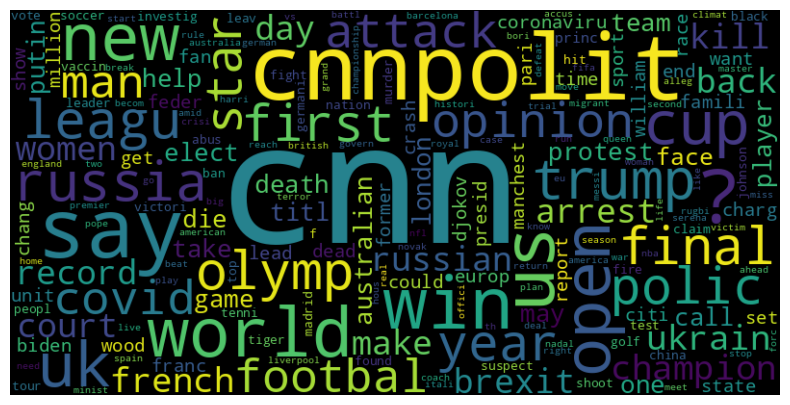

In [30]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

word_freq_headline = bow_headline.sum(axis=0).sort_values(ascending=False).to_dict()
wordcloud_headline = WordCloud(width=800, height=400, background_color='black').generate_from_frequencies(word_freq_headline)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud_headline, interpolation='bilinear')
plt.axis('off')
plt.show()

**Description of Results:** “cnn” appeared the most with 3,564 times, followed by “cnnpolit”(cnn politics) 247 times and “say” 222 times.

## TF-IDF

In [31]:
tfidf_model = TfidfVectorizer(norm = "l2", strip_accents = "ascii", tokenizer = lambda x: stemming_processing(x), min_df=2)
tfidf_model.fit(df["Headline"])

/usr/local/lib/python3.10/dist-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


TfidfVectorizer(min_df=2, strip_accents='ascii',
                tokenizer=<function <lambda> at 0x7d5e6803ae60>)

In [32]:
tfidf_transformed_headline = tfidf_model.transform(df["Headline"])
tfidf_headline = pd.DataFrame(tfidf_transformed_headline.toarray(), columns = tfidf_model.get_feature_names_out())
tfidf_headline

!         ?  aaron  abandon  abbi  abbott  abe  abil  aboard  abort  \
0     0.0  0.000000    0.0      0.0   0.0     0.0  0.0   0.0     0.0    0.0   
1     0.0  0.000000    0.0      0.0   0.0     0.0  0.0   0.0     0.0    0.0   
2     0.0  0.000000    0.0      0.0   0.0     0.0  0.0   0.0     0.0    0.0   
3     0.0  0.000000    0.0      0.0   0.0     0.0  0.0   0.0     0.0    0.0   
4     0.0  0.000000    0.0      0.0   0.0     0.0  0.0   0.0     0.0    0.0   
...   ...       ...    ...      ...   ...     ...  ...   ...     ...    ...   
5686  0.0  0.000000    0.0      0.0   0.0     0.0  0.0   0.0     0.0    0.0   
5687  0.0  0.218817    0.0      0.0   0.0     0.0  0.0   0.0     0.0    0.0   
5688  0.0  0.000000    0.0      0.0   0.0     0.0  0.0   0.0     0.0    0.0   
5689  0.0  0.000000    0.0      0.0   0.0     0.0  0.0   0.0     0.0    0.0   
5690  0.0  0.000000    0.0      0.0   0.0     0.0  0.0   0.0     0.0    0.0   

      ...  zelenski  zero  zidan  zimbabw  zinedin  zion  zlatan  zone  zoo  \
0     ...       0.0   0.0    0.0      0.0      0.0   0.0     0.0   0.0  0.0   
1     ...       0.0   0.0    0.0      0.0      0.0   0.0     0.0   0.0  0.0   
2     ...       0.0   0.0    0.0      0.0      0.0   0.0     0.0   0.0  0.0   
3     ...       0.0   0.0    0.0      0.0      0.0   0.0     0.0   0.0  0.0   
4     ...       0.0   0.0    0.0      0.0      0.0   0.0     0.0   0.0  0.0   
...   ...       ...   ...    ...      ...      ...   ...     ...   ...  ...   
5686  ...       0.0   0.0    0.0      0.0      0.0   0.0     0.0   0.0  0.0   
5687  ...       0.0   0.0    0.0      0.0      0.0   0.0     0.0   0.0  0.0   
5688  ...       0.0   0.0    0.0      0.0      0.0   0.0     0.0   0.0  0.0   
5689  ...       0.0   0.0    0.0      0.0      0.0   0.0     0.0   0.0  0.0   
5690  ...       0.0   0.0    0.0      0.0      0.0   0.0     0.0   0.0  0.0   

      zverev  
0        0.0  
1        0.0  
2        0.0  
3        0.0  
4        0.0  
...      ...  
5686     0.0  
5687     0.0  
5688     0.0  
5689     0.0  
5690     0.0  

[5691 rows x 4141 columns]

In [33]:
tfidf_headline.sum(axis = 0).sort_values(ascending = False)

cnn          343.547382
cnnpolit      80.490943
?             67.477002
say           65.917347
win           60.131860
                ...    
haringey       0.664988
declin         0.643456
factori        0.637387
mcmichael      0.634162
shed           0.626690
Length: 4141, dtype: float64

## Word Cloud for TF-IDF


We perform a Word Cloud analysis on our dataset to visualize the distribution of words and identify the ones that appear most frequently in the dataset.







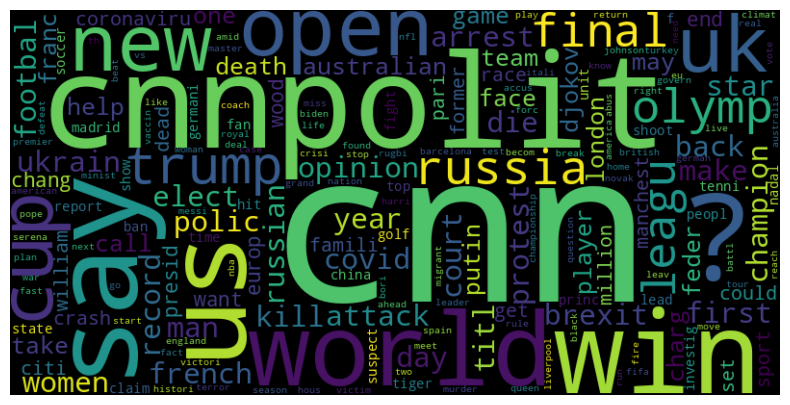

In [34]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

word_freq_headline = tfidf_headline.sum(axis=0).sort_values(ascending=False).to_dict()
wordcloud_headline = WordCloud(width=800, height=400, background_color='black').generate_from_frequencies(word_freq_headline)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud_headline, interpolation='bilinear')
plt.axis('off')
plt.show()

**Description of Results:** We identified the word “cnn” as the most frequent appearance, followed by “cnnpolit”, “say”, “?”, and “win”

# Description: Lyushen Song


We perform Bag-of-Words (BoW) and TF-IDF for the Description column.







## BagOfWords

In [35]:
cv_description = CountVectorizer(strip_accents = "ascii", tokenizer = lambda x: stemming_processing(x), min_df = 2)

cv_description.fit(df["Description"])

#print('number of `tokens`', len(cv_description.vocabulary_))
#cv_description.vocabulary_

/usr/local/lib/python3.10/dist-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


CountVectorizer(min_df=2, strip_accents='ascii',
                tokenizer=<function <lambda> at 0x7d5e6803bf40>)

In [36]:
dtm_description = cv_description.transform(df["Description"])
bow_description = pd.DataFrame(dtm_description.toarray(), columns=cv_description.get_feature_names_out())
bow_description

!  ?  aaron  abaaoud  abandon  abba  abbey  abbi  abbott  abdelhamid  \
0     0  0      0        0        0     0      0     0       0           0   
1     0  0      0        0        0     0      0     0       0           0   
2     0  0      0        0        0     0      0     0       0           0   
3     0  0      0        0        0     0      0     0       0           0   
4     0  0      0        0        0     0      0     0       0           0   
...  .. ..    ...      ...      ...   ...    ...   ...     ...         ...   
5686  0  1      0        0        0     0      0     0       0           0   
5687  0  0      0        0        0     0      0     0       0           0   
5688  0  0      0        0        0     0      0     0       0           0   
5689  0  0      0        0        0     0      0     0       0           0   
5690  0  0      0        0        0     0      0     0       0           0   

      ...  zero  zest  zidan  zimbabw  zinedin  zlatan  zone  zoo  zurich  \
0     ...     0     0      0        0        0       0     0    0       0   
1     ...     0     0      0        0        0       0     0    0       0   
2     ...     0     0      0        0        0       0     0    0       0   
3     ...     0     0      0        0        0       0     0    0       0   
4     ...     0     0      0        0        0       0     0    0       0   
...   ...   ...   ...    ...      ...      ...     ...   ...  ...     ...   
5686  ...     0     0      0        0        0       0     0    0       0   
5687  ...     0     0      0        0        0       0     0    0       0   
5688  ...     0     0      0        0        0       0     0    0       0   
5689  ...     0     0      0        0        0       0     0    0       0   
5690  ...     0     0      0        0        0       0     0    0       0   

      zverev  
0          0  
1          0  
2          0  
3          0  
4          0  
...      ...  
5686       0  
5687       0  
5688       0  
5689       0  
5690       0  

[5691 rows x 6149 columns]

In [37]:
bow_description.sum(axis = 0).sort_values(ascending = False)

world             576
year              498
one               474
said              457
us                429
                 ... 
overnight           2
overrun             2
overthrown          2
overwhelmingli      2
chechen             2
Length: 6149, dtype: int64

## Word Cloud for BagOfWord

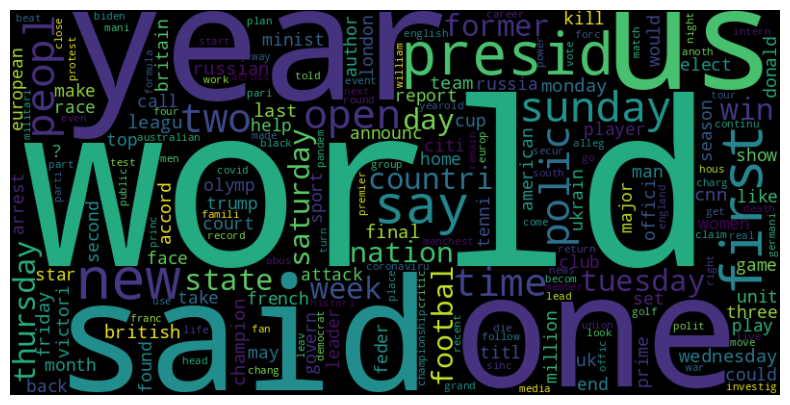

In [38]:
word_freq_description = bow_description.sum(axis=0).sort_values(ascending=False).to_dict()
wordcloud_description = WordCloud(width=800, height=400, background_color='black').generate_from_frequencies(word_freq_description)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud_description, interpolation='bilinear')
plt.axis('off')
plt.show()

**Description of Results:** “world” appeared 376 times, followed by “year” 325 times, and “one” 324 times.

## TF-IDF

In [39]:
tfidf_model_description = TfidfVectorizer(norm = "l2", strip_accents = "ascii", tokenizer = lambda x: stemming_processing(x), min_df=2)
tfidf_model_description.fit(df["Description"])

/usr/local/lib/python3.10/dist-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


TfidfVectorizer(min_df=2, strip_accents='ascii',
                tokenizer=<function <lambda> at 0x7d5e4b7b5000>)

In [40]:
tfidf_transformed_description = tfidf_model_description.transform(df["Description"])
tfidf_description = pd.DataFrame(tfidf_transformed_description.toarray(), columns = tfidf_model_description.get_feature_names_out())
tfidf_description

!         ?  aaron  abaaoud  abandon  abba  abbey  abbi  abbott  \
0     0.0  0.000000    0.0      0.0      0.0   0.0    0.0   0.0     0.0   
1     0.0  0.000000    0.0      0.0      0.0   0.0    0.0   0.0     0.0   
2     0.0  0.000000    0.0      0.0      0.0   0.0    0.0   0.0     0.0   
3     0.0  0.000000    0.0      0.0      0.0   0.0    0.0   0.0     0.0   
4     0.0  0.000000    0.0      0.0      0.0   0.0    0.0   0.0     0.0   
...   ...       ...    ...      ...      ...   ...    ...   ...     ...   
5686  0.0  0.257055    0.0      0.0      0.0   0.0    0.0   0.0     0.0   
5687  0.0  0.000000    0.0      0.0      0.0   0.0    0.0   0.0     0.0   
5688  0.0  0.000000    0.0      0.0      0.0   0.0    0.0   0.0     0.0   
5689  0.0  0.000000    0.0      0.0      0.0   0.0    0.0   0.0     0.0   
5690  0.0  0.000000    0.0      0.0      0.0   0.0    0.0   0.0     0.0   

      abdelhamid  ...  zero  zest  zidan  zimbabw  zinedin  zlatan  zone  zoo  \
0            0.0  ...   0.0   0.0    0.0      0.0      0.0     0.0   0.0  0.0   
1            0.0  ...   0.0   0.0    0.0      0.0      0.0     0.0   0.0  0.0   
2            0.0  ...   0.0   0.0    0.0      0.0      0.0     0.0   0.0  0.0   
3            0.0  ...   0.0   0.0    0.0      0.0      0.0     0.0   0.0  0.0   
4            0.0  ...   0.0   0.0    0.0      0.0      0.0     0.0   0.0  0.0   
...          ...  ...   ...   ...    ...      ...      ...     ...   ...  ...   
5686         0.0  ...   0.0   0.0    0.0      0.0      0.0     0.0   0.0  0.0   
5687         0.0  ...   0.0   0.0    0.0      0.0      0.0     0.0   0.0  0.0   
5688         0.0  ...   0.0   0.0    0.0      0.0      0.0     0.0   0.0  0.0   
5689         0.0  ...   0.0   0.0    0.0      0.0      0.0     0.0   0.0  0.0   
5690         0.0  ...   0.0   0.0    0.0      0.0      0.0     0.0   0.0  0.0   

      zurich  zverev  
0        0.0     0.0  
1        0.0     0.0  
2        0.0     0.0  
3        0.0     0.0  
4        0.0     0.0  
...      ...     ...  
5686     0.0     0.0  
5687     0.0     0.0  
5688     0.0     0.0  
5689     0.0     0.0  
5690     0.0     0.0  

[5691 rows x 6149 columns]

In [41]:
tfidf_description.sum(axis = 0).sort_values(ascending = False)

world        82.601936
year         72.317999
one          70.457072
said         66.520324
us           62.619767
               ...    
uber          0.449145
judiciari     0.443369
wray          0.428625
decent        0.414470
tilt          0.399432
Length: 6149, dtype: float64

## Word Cloud for TF-IDF


We perform a Word Cloud analysis on our dataset to visualize the distribution of words and identify the ones that appear most frequently in the dataset.

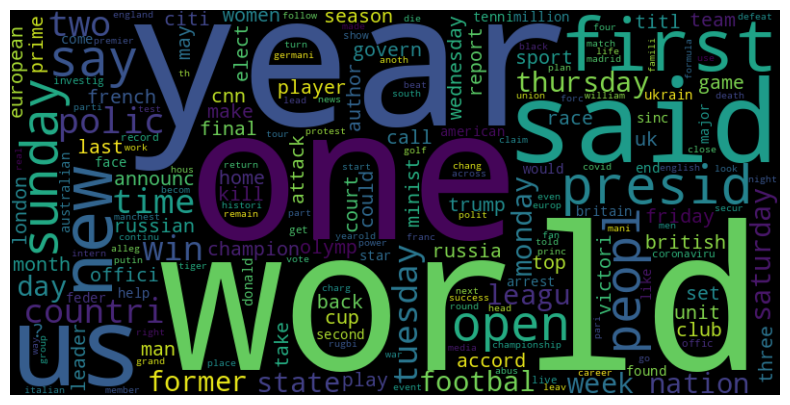

In [42]:
word_freq_description = tfidf_description.sum(axis=0).sort_values(ascending=False).to_dict()
wordcloud_description = WordCloud(width=800, height=400, background_color='black').generate_from_frequencies(word_freq_description)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud_description, interpolation='bilinear')
plt.axis('off')
plt.show()

**Description of Results:** We identified the word “world” as the most frequent appearance, followed by “one”, “year”, “said”, and “first”.

# Second Headline Text - Leonardo Trucios

We perform Bag-of-Words (BoW) and TF-IDF for the Second Headline column.







### BagOfWords

In [43]:
cv_second_headline = CountVectorizer(strip_accents = "ascii", tokenizer = lambda x: stemming_processing(x), min_df = 2)

cv_second_headline.fit(df["Second headline"])

/usr/local/lib/python3.10/dist-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


CountVectorizer(min_df=2, strip_accents='ascii',
                tokenizer=<function <lambda> at 0x7d5e4b7b5d80>)

In [44]:
print('number of `tokens for Second Headline`', len(cv_second_headline.vocabulary_))

number of `tokens for Second Headline` 4209


In [45]:
dtm_2 = cv_second_headline.transform(df["Second headline"])
bow_second_headline = pd.DataFrame(dtm_2.toarray(), columns=cv_second_headline.get_feature_names_out())
bow_second_headline

!  ?  aaron  abandon  abbi  abdeslam  abe  abil  aboard  abort  ...  \
0     0  0      0        0     0         0    0     0       0      0  ...   
1     0  0      0        0     0         0    0     0       0      0  ...   
2     0  0      0        0     0         0    0     0       0      0  ...   
3     0  0      0        0     0         0    0     0       0      0  ...   
4     0  0      0        0     0         0    0     0       0      0  ...   
...  .. ..    ...      ...   ...       ...  ...   ...     ...    ...  ...   
5686  0  0      0        0     0         0    0     0       0      0  ...   
5687  0  1      0        0     0         0    0     0       0      0  ...   
5688  0  0      0        0     0         0    0     0       0      0  ...   
5689  0  0      0        0     0         0    0     0       0      0  ...   
5690  0  0      0        0     0         0    0     0       0      0  ...   

      zelenski  zero  zidan  zimbabw  zinedin  zion  zlatan  zone  zoo  zverev  
0            0     0      0        0        0     0       0     0    0       0  
1            0     0      0        0        0     0       0     0    0       0  
2            0     0      0        0        0     0       0     0    0       0  
3            0     0      0        0        0     0       0     0    0       0  
4            0     0      0        0        0     0       0     0    0       0  
...        ...   ...    ...      ...      ...   ...     ...   ...  ...     ...  
5686         0     0      0        0        0     0       0     0    0       0  
5687         0     0      0        0        0     0       0     0    0       0  
5688         0     0      0        0        0     0       0     0    0       0  
5689         0     0      0        0        0     0       0     0    0       0  
5690         0     0      0        0        0     0       0     0    0       0  

[5691 rows x 4209 columns]

In [46]:
bow_second_headline.sum(axis = 0).sort_values(ascending = False).head()

say      375
?        269
win      245
us       238
world    231
dtype: int64

## Word Cloud for BagOfWord

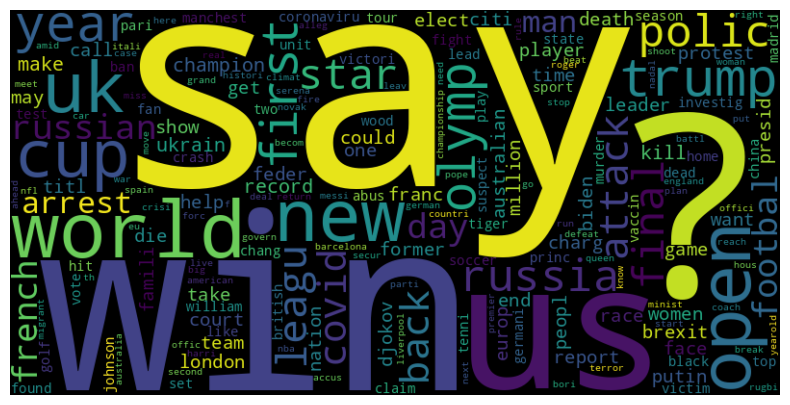

In [47]:
word_freq = bow_second_headline.sum(axis=0).sort_values(ascending=False).to_dict()
wordcloud = WordCloud(width=800, height=400, background_color='black').generate_from_frequencies(word_freq)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

**Description of Results:** “say” appeared 250 times, followed by “?” 187 times, and “win” that appeared 158 times.

## TD-IDF

In [48]:
tfidf_model_second_headline = TfidfVectorizer(norm = "l2", strip_accents = "ascii", tokenizer = lambda x: stemming_processing(x), min_df=2)
tfidf_model_second_headline.fit(df["Second headline"])

/usr/local/lib/python3.10/dist-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


TfidfVectorizer(min_df=2, strip_accents='ascii',
                tokenizer=<function <lambda> at 0x7d5e3aaa9750>)

In [49]:
tfidf_transformed_second_headline = tfidf_model_second_headline.transform(df["Second headline"])
tfidf_second_headline = pd.DataFrame(tfidf_transformed_second_headline.toarray(), columns = tfidf_model_second_headline.get_feature_names_out())
tfidf_second_headline

!         ?  aaron  abandon  abbi  abdeslam  abe  abil  aboard  abort  \
0     0.0  0.000000    0.0      0.0   0.0       0.0  0.0   0.0     0.0    0.0   
1     0.0  0.000000    0.0      0.0   0.0       0.0  0.0   0.0     0.0    0.0   
2     0.0  0.000000    0.0      0.0   0.0       0.0  0.0   0.0     0.0    0.0   
3     0.0  0.000000    0.0      0.0   0.0       0.0  0.0   0.0     0.0    0.0   
4     0.0  0.000000    0.0      0.0   0.0       0.0  0.0   0.0     0.0    0.0   
...   ...       ...    ...      ...   ...       ...  ...   ...     ...    ...   
5686  0.0  0.000000    0.0      0.0   0.0       0.0  0.0   0.0     0.0    0.0   
5687  0.0  0.172461    0.0      0.0   0.0       0.0  0.0   0.0     0.0    0.0   
5688  0.0  0.000000    0.0      0.0   0.0       0.0  0.0   0.0     0.0    0.0   
5689  0.0  0.000000    0.0      0.0   0.0       0.0  0.0   0.0     0.0    0.0   
5690  0.0  0.000000    0.0      0.0   0.0       0.0  0.0   0.0     0.0    0.0   

      ...  zelenski  zero  zidan  zimbabw  zinedin  zion  zlatan  zone  zoo  \
0     ...       0.0   0.0    0.0      0.0      0.0   0.0     0.0   0.0  0.0   
1     ...       0.0   0.0    0.0      0.0      0.0   0.0     0.0   0.0  0.0   
2     ...       0.0   0.0    0.0      0.0      0.0   0.0     0.0   0.0  0.0   
3     ...       0.0   0.0    0.0      0.0      0.0   0.0     0.0   0.0  0.0   
4     ...       0.0   0.0    0.0      0.0      0.0   0.0     0.0   0.0  0.0   
...   ...       ...   ...    ...      ...      ...   ...     ...   ...  ...   
5686  ...       0.0   0.0    0.0      0.0      0.0   0.0     0.0   0.0  0.0   
5687  ...       0.0   0.0    0.0      0.0      0.0   0.0     0.0   0.0  0.0   
5688  ...       0.0   0.0    0.0      0.0      0.0   0.0     0.0   0.0  0.0   
5689  ...       0.0   0.0    0.0      0.0      0.0   0.0     0.0   0.0  0.0   
5690  ...       0.0   0.0    0.0      0.0      0.0   0.0     0.0   0.0  0.0   

      zverev  
0        0.0  
1        0.0  
2        0.0  
3        0.0  
4        0.0  
...      ...  
5686     0.0  
5687     0.0  
5688     0.0  
5689     0.0  
5690     0.0  

[5691 rows x 4209 columns]

In [50]:
tfidf_second_headline.sum(axis = 0).sort_values(ascending = False).head()

say      74.925592
?        68.224476
win      58.481571
world    58.383295
us       56.601716
dtype: float64

## Word Cloud for TF-IDF


We perform a Word Cloud analysis on our dataset to visualize the distribution of words and identify the ones that appear most frequently in the dataset.

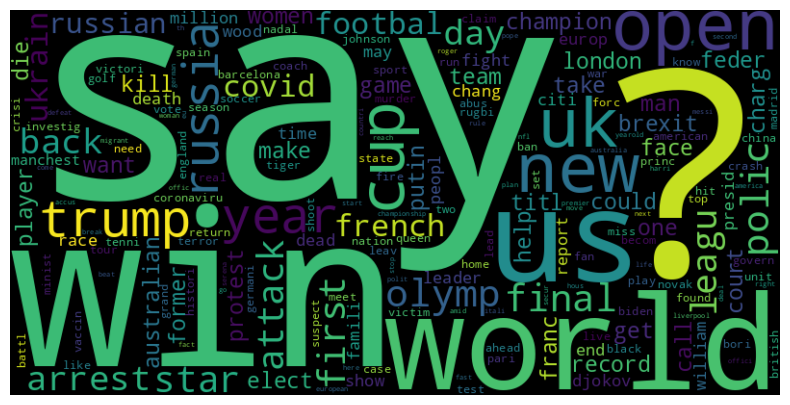

In [51]:
word_freq = tfidf_second_headline.sum(axis = 0).sort_values(ascending = False)
wordcloud = WordCloud(width=800, height=400, background_color='black').generate_from_frequencies(word_freq)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

**Description of Results:** We identified the word “say” as the most frequent appearance, followed by “?”, “world”, “win”, and “us”.

# Keywords - Ashley Mercado

We perform Bag-of-Words (BoW) and TF-IDF for the Keywords column.







## BagOfWords

In [52]:
cv_keywords = CountVectorizer(strip_accents = "ascii", tokenizer = lambda x: stemming_processing(x), min_df = 2)

cv_keywords.fit(df["Keywords"])

/usr/local/lib/python3.10/dist-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


CountVectorizer(min_df=2, strip_accents='ascii',
                tokenizer=<function <lambda> at 0x7d5e3aa7a320>)

In [53]:
print('number of `tokens`', len(cv_keywords.vocabulary_))

number of `tokens` 4394


In [54]:
dtm = cv_keywords.transform(df["Keywords"])
bow_keywords = pd.DataFrame(dtm.toarray(), columns=cv_keywords.get_feature_names_out())
bow_keywords

!  ?  aaron  abandon  abbi  abbott  abdeslam  abe  abil  abl  ...  zero  \
0     0  0      0        0     0       0         0    0     0    0  ...     0   
1     0  0      0        0     0       0         0    0     0    0  ...     0   
2     0  0      0        0     0       0         0    0     0    0  ...     0   
3     0  0      0        0     0       0         0    0     0    0  ...     0   
4     0  0      0        0     0       0         0    0     0    0  ...     0   
...  .. ..    ...      ...   ...     ...       ...  ...   ...  ...  ...   ...   
5686  0  0      0        0     0       0         0    0     0    0  ...     0   
5687  0  1      0        0     0       0         0    0     0    0  ...     0   
5688  0  0      0        0     0       0         0    0     0    0  ...     0   
5689  0  0      0        0     0       0         0    0     0    0  ...     0   
5690  0  0      0        0     0       0         0    0     0    0  ...     0   

      zhang  zidan  zimbabw  zinedin  zion  zlatan  zone  zoo  zverev  
0         0      0        0        0     0       0     0    0       0  
1         0      0        0        0     0       0     0    0       0  
2         0      0        0        0     0       0     0    0       0  
3         0      0        0        0     0       0     0    0       0  
4         0      0        0        0     0       0     0    0       0  
...     ...    ...      ...      ...   ...     ...   ...  ...     ...  
5686      0      0        0        0     0       0     0    0       0  
5687      0      0        0        0     0       0     0    0       0  
5688      0      0        0        0     0       0     0    0       0  
5689      0      0        0        0     0       0     0    0       0  
5690      0      0        0        0     0       0     0    0       0  

[5691 rows x 4394 columns]

In [55]:
bow_keywords.sum(axis = 0).sort_values(ascending = False)

cnn          5331
europ        1645
sport         983
footbal       906
us            565
             ... 
josh            2
bust            2
sebastien       2
judgment        2
softer          2
Length: 4394, dtype: int64

## Word Cloud for BagOfWord

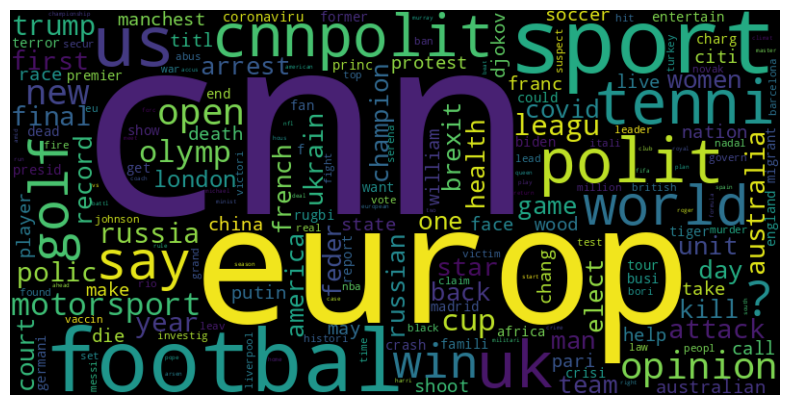

In [56]:
word_freq = bow_keywords.sum(axis=0).sort_values(ascending=False).to_dict()
wordcloud = WordCloud(width=800, height=400, background_color='black').generate_from_frequencies(word_freq)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

**Description of Results:** “cnn” appeared 3576 times, followed by “europ” 1121 times, “sport” came in third with 640 times.

## TF-IDF

In [57]:
tfidf_keywords_model = TfidfVectorizer(norm = "l2", strip_accents = "ascii", tokenizer = lambda x: stemming_processing(x), min_df=2)
tfidf_keywords_model.fit(df["Keywords"])

/usr/local/lib/python3.10/dist-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


TfidfVectorizer(min_df=2, strip_accents='ascii',
                tokenizer=<function <lambda> at 0x7d5e3aa7b250>)

In [58]:
tfidf_transformed_keywords = tfidf_keywords_model.transform(df["Keywords"])
tfidf_keywords = pd.DataFrame(tfidf_transformed_keywords.toarray(), columns = tfidf_keywords_model.get_feature_names_out())
tfidf_keywords

!         ?  aaron  abandon  abbi  abbott  abdeslam  abe  abil  abl  \
0     0.0  0.000000    0.0      0.0   0.0     0.0       0.0  0.0   0.0  0.0   
1     0.0  0.000000    0.0      0.0   0.0     0.0       0.0  0.0   0.0  0.0   
2     0.0  0.000000    0.0      0.0   0.0     0.0       0.0  0.0   0.0  0.0   
3     0.0  0.000000    0.0      0.0   0.0     0.0       0.0  0.0   0.0  0.0   
4     0.0  0.000000    0.0      0.0   0.0     0.0       0.0  0.0   0.0  0.0   
...   ...       ...    ...      ...   ...     ...       ...  ...   ...  ...   
5686  0.0  0.000000    0.0      0.0   0.0     0.0       0.0  0.0   0.0  0.0   
5687  0.0  0.214737    0.0      0.0   0.0     0.0       0.0  0.0   0.0  0.0   
5688  0.0  0.000000    0.0      0.0   0.0     0.0       0.0  0.0   0.0  0.0   
5689  0.0  0.000000    0.0      0.0   0.0     0.0       0.0  0.0   0.0  0.0   
5690  0.0  0.000000    0.0      0.0   0.0     0.0       0.0  0.0   0.0  0.0   

      ...  zero  zhang  zidan  zimbabw  zinedin  zion  zlatan  zone  zoo  \
0     ...   0.0    0.0    0.0      0.0      0.0   0.0     0.0   0.0  0.0   
1     ...   0.0    0.0    0.0      0.0      0.0   0.0     0.0   0.0  0.0   
2     ...   0.0    0.0    0.0      0.0      0.0   0.0     0.0   0.0  0.0   
3     ...   0.0    0.0    0.0      0.0      0.0   0.0     0.0   0.0  0.0   
4     ...   0.0    0.0    0.0      0.0      0.0   0.0     0.0   0.0  0.0   
...   ...   ...    ...    ...      ...      ...   ...     ...   ...  ...   
5686  ...   0.0    0.0    0.0      0.0      0.0   0.0     0.0   0.0  0.0   
5687  ...   0.0    0.0    0.0      0.0      0.0   0.0     0.0   0.0  0.0   
5688  ...   0.0    0.0    0.0      0.0      0.0   0.0     0.0   0.0  0.0   
5689  ...   0.0    0.0    0.0      0.0      0.0   0.0     0.0   0.0  0.0   
5690  ...   0.0    0.0    0.0      0.0      0.0   0.0     0.0   0.0  0.0   

      zverev  
0        0.0  
1        0.0  
2        0.0  
3        0.0  
4        0.0  
...      ...  
5686     0.0  
5687     0.0  
5688     0.0  
5689     0.0  
5690     0.0  

[5691 rows x 4394 columns]

In [59]:
tfidf_keywords.sum(axis = 0).sort_values(ascending = False)

cnn         320.187315
europ       216.960958
footbal     150.578688
sport       145.379514
us          101.003115
               ...    
buemi         0.303136
ev            0.303136
edam          0.303136
ds            0.303136
substanc      0.277670
Length: 4394, dtype: float64

## Word Cloud for TF-IDF


We perform a Word Cloud analysis on our dataset to visualize the distribution of words and identify the ones that appear most frequently in the dataset.

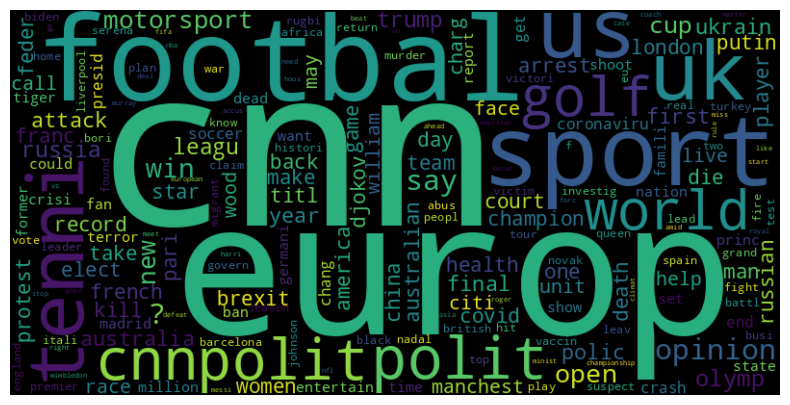

In [60]:
word_freq = tfidf_keywords.sum(axis=0).sort_values(ascending=False).to_dict()
wordcloud = WordCloud(width=800, height=400, background_color='black').generate_from_frequencies(word_freq)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

**Description of Results:** We identified the word “cnn” as the most frequent appearance, followed by “europ”,  “footbal”, “sport”, and “us”.

# **Article Text - Pengru Lin**

We perform Bag-of-Words (BoW) and TF-IDF for the Article Text column.







## BagOfWords


In [61]:
cv_artext = CountVectorizer(strip_accents = "ascii", tokenizer = lambda x: stemming_processing(x), min_df = 2)

cv_artext.fit(df["Article text"])

/usr/local/lib/python3.10/dist-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


CountVectorizer(min_df=2, strip_accents='ascii',
                tokenizer=<function <lambda> at 0x7d5e3aa7be20>)

In [62]:
dtm_artext = cv_artext.transform(df["Article text"])
bow_artext = pd.DataFrame(dtm_artext.toarray(), columns=cv_artext.get_feature_names_out())
bow_artext

!  12  1212  34  ?  _cerysss  aa  aaa  aachen  aaib  ...  zurich  \
0     0   0     0   0  0         0   0    0       0     0  ...       0   
1     0   0     0   0  0         0   0    0       0     0  ...       0   
2     0   0     0   0  0         0   0    0       0     0  ...       0   
3     0   0     0   0  1         0   0    0       0     0  ...       0   
4     0   0     0   0  0         0   0    0       0     0  ...       0   
...  ..  ..   ...  .. ..       ...  ..  ...     ...   ...  ...     ...   
5686  5   0     0   0  3         0   0    0       0     0  ...       0   
5687  0   0     0   0  1         0   0    0       0     0  ...       0   
5688  9   0     0   0  1         0   0    0       0     0  ...       0   
5689  0   0     0   0  0         0   0    0       0     0  ...       0   
5690  0   0     0   0  0         0   0    0       0     0  ...       0   

      zuroff  zuwara  zuzana  zverev  zwart  zwickau  zyl  zyryanov  zyuganov  
0          0       0       0       0      0        0    0         0         0  
1          0       0       0       0      0        0    0         0         0  
2          0       0       0       0      0        0    0         0         0  
3          0       0       0       0      0        0    0         0         0  
4          0       0       0       0      0        0    0         0         0  
...      ...     ...     ...     ...    ...      ...  ...       ...       ...  
5686       0       0       0       0      0        0    0         0         0  
5687       0       0       0       0      0        0    0         0         0  
5688       0       0       0       0      0        0    0         0         0  
5689       0       0       0       0      0        0    0         0         0  
5690       0       0       0       0      0        0    0         0         0  

[5691 rows x 45351 columns]

In [63]:
bow_artext.sum(axis = 0).sort_values(ascending = False)

photo           33261
said            24351
caption         24017
year            12355
world           11959
                ...  
spreadinghid        2
jute                2
midwayhid           2
condizioni          2
howth               2
Length: 45351, dtype: int64

## Word Cloud for BagOfWord

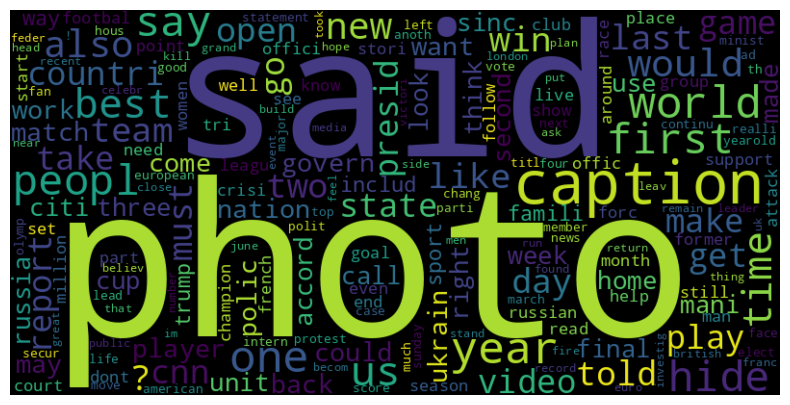

In [64]:
word_freq = bow_artext.sum(axis=0).sort_values(ascending=False).to_dict()
wordcloud = WordCloud(width=800, height=400, background_color='black').generate_from_frequencies(word_freq)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

**Description of Results:** “photo” appeared 21,984 times, followed by “said” 16,153 times, and “caption” came in third with 15,519 times.

## TF-IDF

In [65]:
tfidf_artext_model = TfidfVectorizer(norm = "l2", strip_accents = "ascii", tokenizer = lambda x: stemming_processing(x), min_df=2)
tfidf_artext_model.fit(df["Article text"])

/usr/local/lib/python3.10/dist-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


TfidfVectorizer(min_df=2, strip_accents='ascii',
                tokenizer=<function <lambda> at 0x7d5dfa3571c0>)

In [66]:
tfidf_transformed_artext = tfidf_artext_model.transform(df["Article text"])
tfidf_artext = pd.DataFrame(tfidf_transformed_artext.toarray(), columns = tfidf_artext_model.get_feature_names_out())
tfidf_artext

!   12  1212   34         ?  _cerysss   aa  aaa  aachen  aaib  \
0     0.000000  0.0   0.0  0.0  0.000000       0.0  0.0  0.0     0.0   0.0   
1     0.000000  0.0   0.0  0.0  0.000000       0.0  0.0  0.0     0.0   0.0   
2     0.000000  0.0   0.0  0.0  0.000000       0.0  0.0  0.0     0.0   0.0   
3     0.000000  0.0   0.0  0.0  0.007594       0.0  0.0  0.0     0.0   0.0   
4     0.000000  0.0   0.0  0.0  0.000000       0.0  0.0  0.0     0.0   0.0   
...        ...  ...   ...  ...       ...       ...  ...  ...     ...   ...   
5686  0.122074  0.0   0.0  0.0  0.049101       0.0  0.0  0.0     0.0   0.0   
5687  0.000000  0.0   0.0  0.0  0.009245       0.0  0.0  0.0     0.0   0.0   
5688  0.176943  0.0   0.0  0.0  0.013180       0.0  0.0  0.0     0.0   0.0   
5689  0.000000  0.0   0.0  0.0  0.000000       0.0  0.0  0.0     0.0   0.0   
5690  0.000000  0.0   0.0  0.0  0.000000       0.0  0.0  0.0     0.0   0.0   

      ...  zurich  zuroff  zuwara  zuzana  zverev  zwart  zwickau  zyl  \
0     ...     0.0     0.0     0.0     0.0     0.0    0.0      0.0  0.0   
1     ...     0.0     0.0     0.0     0.0     0.0    0.0      0.0  0.0   
2     ...     0.0     0.0     0.0     0.0     0.0    0.0      0.0  0.0   
3     ...     0.0     0.0     0.0     0.0     0.0    0.0      0.0  0.0   
4     ...     0.0     0.0     0.0     0.0     0.0    0.0      0.0  0.0   
...   ...     ...     ...     ...     ...     ...    ...      ...  ...   
5686  ...     0.0     0.0     0.0     0.0     0.0    0.0      0.0  0.0   
5687  ...     0.0     0.0     0.0     0.0     0.0    0.0      0.0  0.0   
5688  ...     0.0     0.0     0.0     0.0     0.0    0.0      0.0  0.0   
5689  ...     0.0     0.0     0.0     0.0     0.0    0.0      0.0  0.0   
5690  ...     0.0     0.0     0.0     0.0     0.0    0.0      0.0  0.0   

      zyryanov  zyuganov  
0          0.0       0.0  
1          0.0       0.0  
2          0.0       0.0  
3          0.0       0.0  
4          0.0       0.0  
...        ...       ...  
5686       0.0       0.0  
5687       0.0       0.0  
5688       0.0       0.0  
5689       0.0       0.0  
5690       0.0       0.0  

[5691 rows x 45351 columns]

In [67]:
tfidf_artext.sum(axis = 0).sort_values(ascending = False).head()

said       181.592972
photo      142.277586
caption    128.886147
world      105.020812
year       101.963747
dtype: float64

## Word Cloud for TF-IDF

We perform a Word Cloud analysis on our dataset to visualize the distribution of words and identify the ones that appear most frequently in the dataset.

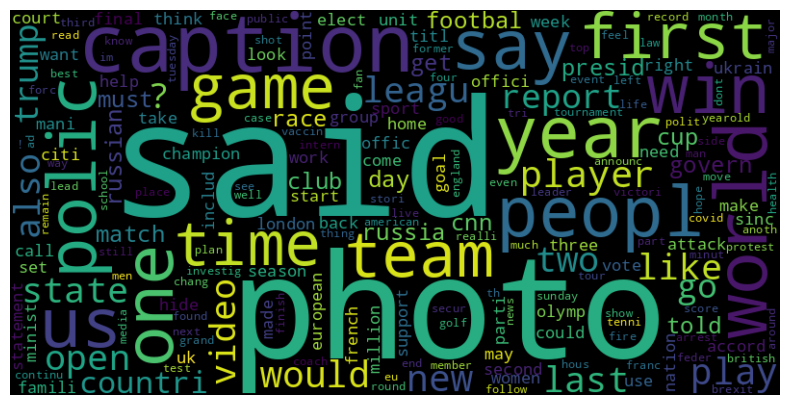

In [68]:
word_freq = tfidf_artext.sum(axis=0).sort_values(ascending=False).to_dict()
wordcloud = WordCloud(width=800, height=400, background_color='black').generate_from_frequencies(word_freq)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

**Description of Results:** “said” is the most frequent word, followed by “photo”, “caption”, “world”, and “year”. This is interesting because in BoW, “photo” was the most frequent word.

#Modeling

We perform sentiment analysis using different methodologies. Firstly, we can perform vector comparison using cosine similarity to gain an initial understanding of the sentiment in each row. Subsequently, we will conduct an analysis with NLTK's SentimentIntensityAnalyzer, which will be applied to all five columns. The results will then be averaged to reduce noise. To visualize the sentiment, we can plot it on a timeline to observe any consistent trends or identify any noticeable changes in the sentiment of the news. Finally, we can perform market basket analysis using the Author category and section data to discover interesting patterns.

## Sentiment Analysis

In [69]:
import nltk
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [70]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer

analyzer = SentimentIntensityAnalyzer()

def get_sentiment(text):
    scores = analyzer.polarity_scores(text)
    if scores['neu'] > scores['neg'] and scores['neu'] > scores['pos']:
        sentiment = 0
    else:
        sentiment = 1 if scores['pos'] > scores['neg'] else -1
    return sentiment

In [71]:
column_list = ["Headline", "Description", "Keywords", "Second headline", "Article text"]

for text in column_list:
    df[f'Supervised_Sentiment_{text}'] = df[text].apply(get_sentiment)

df.head()

Author Date published  \
8850                   John Newsome and Ralph Ellis, CNN        2016/12   
4731                              Laura Smith-Spark, CNN        2018/01   
25132                Dakin Andone and Vasco Cotovio, CNN        2017/12   
18330  Frederik Pleitgen, Steve Almasy and Alla Eshch...        2015/02   
13314                                          Anonymous        2012/07   

      Category     Section                                           Headline  \
8850      news          us  former texas rangers pitcher john barfield sho...   
4731      news  middleeast  un experts urge iran to respect protesters rig...   
25132     news      europe  prosecutor bosnian croat war criminal had cyan...   
18330     news      europe        boris nemtsov critic of putin shot dead cnn   
13314    sport      tennis  murray ends marathon match to seal wimbledon l...   

                                             Description  \
8850   former texas rangers pitcher john barfield was...   
4731   un human rights experts urged iranian authorit...   
25132  the bosnian croat war criminal who died wednes...   
18330  russian opposition leader boris nemtsov was ki...   
13314  andy murray recorded a double triumph on tuesd...   

                                                Keywords  \
8850   us former texas rangers pitcher john barfield ...   
4731   middleeast un experts urge iran to respect pro...   
25132  europe prosecutor bosnian croat war criminal h...   
18330  europe boris nemtsov critic of putin shot dead...   
13314  tennis murray ends marathon match to seal wimb...   

                                         Second headline  \
8850   former texas rangers pitcher john barfield sho...   
4731   un experts urge iran to respect rights of prot...   
25132  prosecutor bosnian croat war criminal died of ...   
18330  boris nemtsov outspoken putin critic shot dead...   
13314  murray ends marathon match to seal wimbledon l...   

                                            Article text  \
8850   story highlightsthe domestic incident occurred...   
4731   cnnun human rights experts urged iranian autho...   
25132  story highlightsslobodan praljak a former croa...   
18330  story highlights a mourning march will be held...   
13314  story highlightsbritains andy murray books wim...   

       Supervised_Sentiment_Headline  Supervised_Sentiment_Description  \
8850                               0                                 0   
4731                               0                                 0   
25132                              0                                 0   
18330                             -1                                 0   
13314                              0                                 0   

       Supervised_Sentiment_Keywords  Supervised_Sentiment_Second headline  \
8850                               0                                     0   
4731                               0                                     0   
25132                              0                                    -1   
18330                              0                                     0   
13314                              0                                     0   

       Supervised_Sentiment_Article text  
8850                                   0  
4731                                   0  
25132                                  0  
18330                                  0  
13314                                  0

In [72]:
results_columns = ['Supervised_Sentiment_Headline', 'Supervised_Sentiment_Description', 'Supervised_Sentiment_Keywords', 'Supervised_Sentiment_Second headline', 'Supervised_Sentiment_Article text']

df['Supervised_Average_Sentiment'] = df[results_columns].mode(axis=1)[0]

df.head()

Author Date published  \
8850                   John Newsome and Ralph Ellis, CNN        2016/12   
4731                              Laura Smith-Spark, CNN        2018/01   
25132                Dakin Andone and Vasco Cotovio, CNN        2017/12   
18330  Frederik Pleitgen, Steve Almasy and Alla Eshch...        2015/02   
13314                                          Anonymous        2012/07   

      Category     Section                                           Headline  \
8850      news          us  former texas rangers pitcher john barfield sho...   
4731      news  middleeast  un experts urge iran to respect protesters rig...   
25132     news      europe  prosecutor bosnian croat war criminal had cyan...   
18330     news      europe        boris nemtsov critic of putin shot dead cnn   
13314    sport      tennis  murray ends marathon match to seal wimbledon l...   

                                             Description  \
8850   former texas rangers pitcher john barfield was...   
4731   un human rights experts urged iranian authorit...   
25132  the bosnian croat war criminal who died wednes...   
18330  russian opposition leader boris nemtsov was ki...   
13314  andy murray recorded a double triumph on tuesd...   

                                                Keywords  \
8850   us former texas rangers pitcher john barfield ...   
4731   middleeast un experts urge iran to respect pro...   
25132  europe prosecutor bosnian croat war criminal h...   
18330  europe boris nemtsov critic of putin shot dead...   
13314  tennis murray ends marathon match to seal wimb...   

                                         Second headline  \
8850   former texas rangers pitcher john barfield sho...   
4731   un experts urge iran to respect rights of prot...   
25132  prosecutor bosnian croat war criminal died of ...   
18330  boris nemtsov outspoken putin critic shot dead...   
13314  murray ends marathon match to seal wimbledon l...   

                                            Article text  \
8850   story highlightsthe domestic incident occurred...   
4731   cnnun human rights experts urged iranian autho...   
25132  story highlightsslobodan praljak a former croa...   
18330  story highlights a mourning march will be held...   
13314  story highlightsbritains andy murray books wim...   

       Supervised_Sentiment_Headline  Supervised_Sentiment_Description  \
8850                               0                                 0   
4731                               0                                 0   
25132                              0                                 0   
18330                             -1                                 0   
13314                              0                                 0   

       Supervised_Sentiment_Keywords  Supervised_Sentiment_Second headline  \
8850                               0                                     0   
4731                               0                                     0   
25132                              0                                    -1   
18330                              0                                     0   
13314                              0                                     0   

       Supervised_Sentiment_Article text  Supervised_Average_Sentiment  
8850                                   0                             0  
4731                                   0                             0  
25132                                  0                             0  
18330                                  0                             0  
13314                                  0                             0

In [73]:
df.drop(columns=results_columns, axis = 1, inplace=True)
df

Author Date published  \
8850                   John Newsome and Ralph Ellis, CNN        2016/12   
4731                              Laura Smith-Spark, CNN        2018/01   
25132                Dakin Andone and Vasco Cotovio, CNN        2017/12   
18330  Frederik Pleitgen, Steve Almasy and Alla Eshch...        2015/02   
13314                                          Anonymous        2012/07   
...                                                  ...            ...   
4553                     Polina Marinova, Special to CNN        2013/04   
5690                                 Kristen Rogers, CNN        2021/04   
18867                                   Gary Morley, CNN        2015/05   
25024                          Eliott C. McLaughlin, CNN        2017/12   
12939                          By Laura Smith-Spark, CNN        2012/06   

      Category     Section                                           Headline  \
8850      news          us  former texas rangers pitcher john barfield sho...   
4731      news  middleeast  un experts urge iran to respect protesters rig...   
25132     news      europe  prosecutor bosnian croat war criminal had cyan...   
18330     news      europe        boris nemtsov critic of putin shot dead cnn   
13314    sport      tennis  murray ends marathon match to seal wimbledon l...   
...        ...         ...                                                ...   
4553      news      living             what the late s really looked like cnn   
5690    health      health  is it safe to go to church or other religious ...   
18867    sport    football  chelsea stars give didier drogba ultimate send...   
25024    sport    football  amid olympics doping scandal russia world cup ...   
12939     news      europe  swedish nuclear security boosted after explosi...   

                                             Description  \
8850   former texas rangers pitcher john barfield was...   
4731   un human rights experts urged iranian authorit...   
25132  the bosnian croat war criminal who died wednes...   
18330  russian opposition leader boris nemtsov was ki...   
13314  andy murray recorded a double triumph on tuesd...   
...                                                  ...   
4553   with mad men starting back up we wanted to kno...   
5690   if holiday church or other religious services ...   
18867  didier drogba was a key figure in jose mourinh...   
25024  the chairman of russias successful world cup l...   
12939  security has been raised at swedens nuclear pl...   

                                                Keywords  \
8850   us former texas rangers pitcher john barfield ...   
4731   middleeast un experts urge iran to respect pro...   
25132  europe prosecutor bosnian croat war criminal h...   
18330  europe boris nemtsov critic of putin shot dead...   
13314  tennis murray ends marathon match to seal wimb...   
...                                                  ...   
4553       living what the late s really looked like cnn   
5690   health is it safe to go to church or other rel...   
18867  football chelsea stars give didier drogba ulti...   
25024  football amid olympics doping scandal russia w...   
12939  europe swedish nuclear security boosted after ...   

                                         Second headline  \
8850   former texas rangers pitcher john barfield sho...   
4731   un experts urge iran to respect rights of prot...   
25132  prosecutor bosnian croat war criminal died of ...   
18330  boris nemtsov outspoken putin critic shot dead...   
13314  murray ends marathon match to seal wimbledon l...   
...                                                  ...   
4553                  what the late s really looked like   
5690   how safe is it to attend holiday religious ser...   
18867  english premier league chelsea stars give didi...   
25024  amid olympics doping scandal russia world cup ...   
12939  swedish nuclear security boosted after explosi...   

             

In [74]:
import plotly.express as px

fig = px.histogram(df, x="Supervised_Average_Sentiment")

fig.show()

ur analysis reveals a skewed distribution in the predicted sentiment of the news. This finding is not entirely surprising, considering that negativity often garners more attention than positivity in news coverage. However, the observed 70/30 ratio between negative and positive sentiment is higher than anticipated. While this conclusion is tentative, further investigation is warranted since the model was not trained on our data, leading to the possibility of having bias.

In [75]:
import plotly.express as px

df_grouped = df.groupby("Date published")["Supervised_Average_Sentiment"].mean().reset_index()

fig = px.line(df_grouped, x="Date published", y="Supervised_Average_Sentiment")

fig.show()

Plotting a line graph of the average sentiment per month reveals significant fluctuations, resembling the volatility of stock returns. Interestingly, the peaks and valleys lack any discernible recurring pattern, suggesting the changes in sentiment may not be primarily driven by seasonality. This possibility warrants further investigation, which we will undertake in the second deliverable.

## Vector Comparison

*Mauro and Pengru completed the Vector Comparsion*

In [76]:
import gensim.downloader as api
from nltk.tokenize import word_tokenize
from gensim.models import Word2Vec

def tokenize_articles(df_column):
    tokenized_articles = []
    for article in df_column:
        tokens = word_tokenize(article)
        tokenized_articles.append(tokens)
    return tokenized_articles

tokenized_articles = tokenize_articles(df["Article text"])

model_word2vec = Word2Vec(sentences=tokenized_articles, vector_size=100, window=5, min_count=1, workers=4)
model_word2vec = model_word2vec.wv

#model_word2vec = api.load("glove-wiki-gigaword-50")

We base the positive sentence and negative baseline sentences as the following, which are obrainted from using the NLTK sentiment analyzer to get the words that gives us the highes positive and negative sentiment.

In [77]:
positive_sentence = "love happy joy smile laughter hope kindness gratitude blessing wonderful fantastic awesome amazing beautiful bright brilliant cheerful delightful excellent fabulous glorious harmony incredible jubilant lucky marvelous miracle optimistic paradise perfect radiant serene splendid sunshine terrific vibrant victorious vivacious wondrous bliss grace euphoria felicity charming exhilarating magnificent sensational delicious bounty savor glow genuine heartfelt ecstasy effervescent inspiring refreshing uplifting tranquil unforgettable sunny rainbow blissful rejoice thriving splendor laughter festive sparkling enchanting captivating festivity jolly cheer fun celebration grateful abundance brighten merry delight gleeful gladness satisfaction harmonious upbeat playful exultant radiate exuberant jovial heartwarming courageous spirited dreamy pride triumphant happiness affectionate amiable angelic blissful buoyant bubbly carefree charismatic chirpy colorful comical compassionate confident content convivial dazzling divine ebullient ecstatic eloquent enjoyable enthusiastic euphoric exuberant faithful fascinating friendly frisky fun-loving gentle glamorous gleaming glorious grateful hilarious humorous jocund joyful jubilant lovable luminous magnetic mirthful nostalgic optimistic passionate peaceful pleasant radiant rapturous resplendent sanguine serene soothing sparkling spirited sprightly stimulating sunny sweet tender thankful tranquil vibrant vivacious warmhearted whimsical zestful zesty uplifting exhilarating ecstatic joyous exultant merry blithe elated overjoyed euphoric radiant blissful thrilled contented satisfied gratified gleeful jubilant enthralled jovial delighted ecstatic cheerful jolly buoyant sunny mirthful glad"

analyzer.polarity_scores(positive_sentence)

{'neg': 0.0, 'neu': 0.09, 'pos': 0.91, 'compound': 0.9999}

In [78]:
positive_sentence = word_tokenize(positive_sentence)

{'neg': 0.158, 'neu': 0.583, 'pos': 0.258, 'compound': 0.296}

In [79]:
negative_sentence = "abandoned, abhorrent, abominable, abrasive, abrupt, absurd, abysmal, adverse, agonizing, aimless, alienated, aloof, ambiguous, angry, annoying, anxious, apathetic, appalling, arrogant, atrocious, awful, awkward, barren, belligerent, bewildered, bitter, bland, bleak, blunt, boorish, boring, brash, brittle, brutal, callous, chaotic, clumsy, coarse, cold, colorless, complacent, complicated, confrontational, confused, contradictory, corrosive, corrupt, cowardly, crass, crazy, creepy, criminal, cruel, cumbersome, cynical, dangerous, dark, deadly, deceitful, defeated, deficient, dejected, delicate, delirious, demoralized, deplorable, depressing, deprived, desolate, desperate, destructive, detached, detrimental, devastating, diabolic, difficult, dim, dirty, disappointing, disastrous, discontented, discouraging, disgraceful, disgusting, dishonest, disillusioned, disinterested, disloyal, dismal, disorderly, disorganized, displeasing, disrespectful, dissatisfied, distasteful, distraught, distressed, disturbing, dreadful, dreary, dull, embarrassing, emotionless, empty, enraged, envious, erratic, exasperating, exhausting, exploitative, extraneous, fail, fake, false, fearful, feeble, filthy, flawed, foolish, forlorn, fragile, frightening, frustrating, furious, futile, gloomy, grave, greedy, grim, grimy, gross, gruesome, guilty, hapless, hard, harsh, hateful, heartbreaking, heavy, hideous, hopeless, horrible, hostile, humiliating, hurtful, hysterical, icky, idiotic, ignorant, ill, immature, imperfect, impossible, impotent, impulsive, inactive, incoherent, incompetent, inconsiderate, inconsistent, indecisive, indifferent, ineffective, inefficient, inferior, infernal, infuriating, insecure, insidious, insignificant, insincere, insipid, insufferable, intolerant, irrational, irresponsible, irritating, joyless, lame, lazy, lethal, lonely, lousy, ludicrous, malicious, malodorous, meaningless, mediocre, melancholic, miserable, miserly, monotonous, monstrous, moody, morbid, mortifying, mundane, murky, naive, narrow, nasty, negative, neurotic, nightmarish, nonchalant, nondescript, nonexistent, nonproductive, nonsensical, notorious, noxious, obnoxious, obscene, obsessive, obstructive, odd, offensive, ominous, oppressive, outrageous, overwhelming, painful, pathetic, petty, pitiful, poor, preposterous, pretentious, primitive, prickly, procrastinating, provocative, pessimistic, puny, questionable, quirky, radical, rash, ratty, repulsive, resentful, restless, ridiculous, rigid, rough, rude, ruthless, sad, savage, scandalous, scary, selfish, senseless, shameful, shameless, shocking, shoddy, silly, sinister, sloppy, slovenly, slow, sluggish, smelly, sneaky, snobbish, sorrowful, sorry, spiteful, stale, stupid, submissive, sulky, sullen, suspicious, tacky, tasteless, tedious, temperamental, tense, terrible, terrifying, threatening, timid, tiresome, toxic, tragic, trashy, troublesome, twisted, ugly, unbearable, unfair, unhappy, unhealthy, unpleasant, unpredictable, unreasonable, unreliable, unstable, unsure, unworthy, upsetting, useless, vague, vicious, vile, villainous, vindictive, violent, vulgar, wary, weary, weird, wicked, woeful, worthless, wretched"

analyzer.polarity_scores(negative_sentence)

{'neg': 0.804, 'neu': 0.192, 'pos': 0.004, 'compound': -0.9999}

In [80]:
negative_sentence = word_tokenize(negative_sentence)

In [81]:
neutral_sentence = "the article is going on as usual and nothing happened"

analyzer.polarity_scores(neutral_sentence)

{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}

In [82]:
neutral_sentence = word_tokenize(neutral_sentence)

In [83]:
def get_sentiment_score(sentence):
    if not sentence.strip():
      return None

    pos = model_word2vec.n_similarity(word_tokenize(sentence), positive_sentence)
    neg = model_word2vec.n_similarity(word_tokenize(sentence), negative_sentence)
    neu = model_word2vec.n_similarity(word_tokenize(sentence), neutral_sentence)
    if max(neu, pos, neg) == pos:
        sentiment = 1
    elif max(neu, pos, neg) == neu:
        sentiment = 0
    else:
        sentiment = -1
    return sentiment

for text in column_list:
    df[f'Unsupervised_Sentiment_{text}'] = df[text].apply(get_sentiment_score)

df.head()

Author Date published  \
8850                   John Newsome and Ralph Ellis, CNN        2016/12   
4731                              Laura Smith-Spark, CNN        2018/01   
25132                Dakin Andone and Vasco Cotovio, CNN        2017/12   
18330  Frederik Pleitgen, Steve Almasy and Alla Eshch...        2015/02   
13314                                          Anonymous        2012/07   

      Category     Section                                           Headline  \
8850      news          us  former texas rangers pitcher john barfield sho...   
4731      news  middleeast  un experts urge iran to respect protesters rig...   
25132     news      europe  prosecutor bosnian croat war criminal had cyan...   
18330     news      europe        boris nemtsov critic of putin shot dead cnn   
13314    sport      tennis  murray ends marathon match to seal wimbledon l...   

                                             Description  \
8850   former texas rangers pitcher john barfield was...   
4731   un human rights experts urged iranian authorit...   
25132  the bosnian croat war criminal who died wednes...   
18330  russian opposition leader boris nemtsov was ki...   
13314  andy murray recorded a double triumph on tuesd...   

                                                Keywords  \
8850   us former texas rangers pitcher john barfield ...   
4731   middleeast un experts urge iran to respect pro...   
25132  europe prosecutor bosnian croat war criminal h...   
18330  europe boris nemtsov critic of putin shot dead...   
13314  tennis murray ends marathon match to seal wimb...   

                                         Second headline  \
8850   former texas rangers pitcher john barfield sho...   
4731   un experts urge iran to respect rights of prot...   
25132  prosecutor bosnian croat war criminal died of ...   
18330  boris nemtsov outspoken putin critic shot dead...   
13314  murray ends marathon match to seal wimbledon l...   

                                            Article text  \
8850   story highlightsthe domestic incident occurred...   
4731   cnnun human rights experts urged iranian autho...   
25132  story highlightsslobodan praljak a former croa...   
18330  story highlights a mourning march will be held...   
13314  story highlightsbritains andy murray books wim...   

       Supervised_Average_Sentiment  Unsupervised_Sentiment_Headline  \
8850                              0                                1   
4731                              0                                0   
25132                             0                                0   
18330                             0                               -1   
13314                             0                                1   

       Unsupervised_Sentiment_Description  Unsupervised_Sentiment_Keywords  \
8850                                  0.0                                1   
4731                                  0.0                                0   
25132                                 0.0                                0   
18330                                 0.0                               -1   
13314                                 0.0                                1   

       Unsupervised_Sentiment_Second headline  \
8850                                        1   
4731                                        0   
25132                                      -1   
18330                                      -1   
13314                                       1   

       Unsupervised_Sentiment_Article text  
8850                                   0.0  
4731                                   0.0  
25132                                  0.0  
18330                                  0.0  
13314                                  1.0

In [84]:
df.columns

Index(['Author', 'Date published', 'Category', 'Section', 'Headline',
       'Description', 'Keywords', 'Second headline', 'Article text',
       'Supervised_Average_Sentiment', 'Unsupervised_Sentiment_Headline',
       'Unsupervised_Sentiment_Description', 'Unsupervised_Sentiment_Keywords',
       'Unsupervised_Sentiment_Second headline',
       'Unsupervised_Sentiment_Article text'],
      dtype='object')

In [85]:
unsupervised_columns = ["Unsupervised_Sentiment_Headline","Unsupervised_Sentiment_Description", "Unsupervised_Sentiment_Keywords", "Unsupervised_Sentiment_Second headline", "Unsupervised_Sentiment_Article text"]

df["Unsupervised_Average_Sentiment"] = df[unsupervised_columns].mode(axis=1)[0]

df.head()

Author Date published  \
8850                   John Newsome and Ralph Ellis, CNN        2016/12   
4731                              Laura Smith-Spark, CNN        2018/01   
25132                Dakin Andone and Vasco Cotovio, CNN        2017/12   
18330  Frederik Pleitgen, Steve Almasy and Alla Eshch...        2015/02   
13314                                          Anonymous        2012/07   

      Category     Section                                           Headline  \
8850      news          us  former texas rangers pitcher john barfield sho...   
4731      news  middleeast  un experts urge iran to respect protesters rig...   
25132     news      europe  prosecutor bosnian croat war criminal had cyan...   
18330     news      europe        boris nemtsov critic of putin shot dead cnn   
13314    sport      tennis  murray ends marathon match to seal wimbledon l...   

                                             Description  \
8850   former texas rangers pitcher john barfield was...   
4731   un human rights experts urged iranian authorit...   
25132  the bosnian croat war criminal who died wednes...   
18330  russian opposition leader boris nemtsov was ki...   
13314  andy murray recorded a double triumph on tuesd...   

                                                Keywords  \
8850   us former texas rangers pitcher john barfield ...   
4731   middleeast un experts urge iran to respect pro...   
25132  europe prosecutor bosnian croat war criminal h...   
18330  europe boris nemtsov critic of putin shot dead...   
13314  tennis murray ends marathon match to seal wimb...   

                                         Second headline  \
8850   former texas rangers pitcher john barfield sho...   
4731   un experts urge iran to respect rights of prot...   
25132  prosecutor bosnian croat war criminal died of ...   
18330  boris nemtsov outspoken putin critic shot dead...   
13314  murray ends marathon match to seal wimbledon l...   

                                            Article text  \
8850   story highlightsthe domestic incident occurred...   
4731   cnnun human rights experts urged iranian autho...   
25132  story highlightsslobodan praljak a former croa...   
18330  story highlights a mourning march will be held...   
13314  story highlightsbritains andy murray books wim...   

       Supervised_Average_Sentiment  Unsupervised_Sentiment_Headline  \
8850                              0                                1   
4731                              0                                0   
25132                             0                                0   
18330                             0                               -1   
13314                             0                                1   

       Unsupervised_Sentiment_Description  Unsupervised_Sentiment_Keywords  \
8850                                  0.0                                1   
4731                                  0.0                                0   
25132                                 0.0                                0   
18330                                 0.0                               -1   
13314                                 0.0                                1   

       Unsupervised_Sentiment_Second headline  \
8850                                        1   
4731                                        0   
25132                                      -1   
18330                                      -1   
13314                                       1   

       Unsupervised_Sentiment_Article text  Unsupervised_Average_Sentiment  
8850                                   0.0                             1.0  
4731                                   0.0                             0.0  
25132                                  0.0                             0.0  
18330                                  0.0                            -1.0  
13314                                  1.0                             1.0

In [86]:
df.drop(columns=unsupervised_columns, axis = 1, inplace=True)
df

Author Date published  \
8850                   John Newsome and Ralph Ellis, CNN        2016/12   
4731                              Laura Smith-Spark, CNN        2018/01   
25132                Dakin Andone and Vasco Cotovio, CNN        2017/12   
18330  Frederik Pleitgen, Steve Almasy and Alla Eshch...        2015/02   
13314                                          Anonymous        2012/07   
...                                                  ...            ...   
4553                     Polina Marinova, Special to CNN        2013/04   
5690                                 Kristen Rogers, CNN        2021/04   
18867                                   Gary Morley, CNN        2015/05   
25024                          Eliott C. McLaughlin, CNN        2017/12   
12939                          By Laura Smith-Spark, CNN        2012/06   

      Category     Section                                           Headline  \
8850      news          us  former texas rangers pitcher john barfield sho...   
4731      news  middleeast  un experts urge iran to respect protesters rig...   
25132     news      europe  prosecutor bosnian croat war criminal had cyan...   
18330     news      europe        boris nemtsov critic of putin shot dead cnn   
13314    sport      tennis  murray ends marathon match to seal wimbledon l...   
...        ...         ...                                                ...   
4553      news      living             what the late s really looked like cnn   
5690    health      health  is it safe to go to church or other religious ...   
18867    sport    football  chelsea stars give didier drogba ultimate send...   
25024    sport    football  amid olympics doping scandal russia world cup ...   
12939     news      europe  swedish nuclear security boosted after explosi...   

                                             Description  \
8850   former texas rangers pitcher john barfield was...   
4731   un human rights experts urged iranian authorit...   
25132  the bosnian croat war criminal who died wednes...   
18330  russian opposition leader boris nemtsov was ki...   
13314  andy murray recorded a double triumph on tuesd...   
...                                                  ...   
4553   with mad men starting back up we wanted to kno...   
5690   if holiday church or other religious services ...   
18867  didier drogba was a key figure in jose mourinh...   
25024  the chairman of russias successful world cup l...   
12939  security has been raised at swedens nuclear pl...   

                                                Keywords  \
8850   us former texas rangers pitcher john barfield ...   
4731   middleeast un experts urge iran to respect pro...   
25132  europe prosecutor bosnian croat war criminal h...   
18330  europe boris nemtsov critic of putin shot dead...   
13314  tennis murray ends marathon match to seal wimb...   
...                                                  ...   
4553       living what the late s really looked like cnn   
5690   health is it safe to go to church or other rel...   
18867  football chelsea stars give didier drogba ulti...   
25024  football amid olympics doping scandal russia w...   
12939  europe swedish nuclear security boosted after ...   

                                         Second headline  \
8850   former texas rangers pitcher john barfield sho...   
4731   un experts urge iran to respect rights of prot...   
25132  prosecutor bosnian croat war criminal died of ...   
18330  boris nemtsov outspoken putin critic shot dead...   
13314  murray ends marathon match to seal wimbledon l...   
...                                                  ...   
4553                  what the late s really looked like   
5690   how safe is it to attend holiday religious ser...   
18867  english premier league chelsea stars give didi...   
25024  amid olympics doping scandal russia world cup ...   
12939  swedish nuclear security boosted after explosi...   

             

In [87]:
df[df["Unsupervised_Average_Sentiment"] != df["Supervised_Average_Sentiment"]]

Author Date published  \
8850                   John Newsome and Ralph Ellis, CNN        2016/12   
18330  Frederik Pleitgen, Steve Almasy and Alla Eshch...        2015/02   
13314                                          Anonymous        2012/07   
19878                                         Sarah Holt        2015/10   
19406                                  Tom Sweetman, CNN        2015/08   
...                                                  ...            ...   
20886           Shasta Darlington and Flora Charner, CNN        2016/04   
28702                         Danielle Rossingh, for CNN        2019/04   
19111            Kimberly Hutcherson and Don Melvin, CNN        2015/06   
18867                                   Gary Morley, CNN        2015/05   
25024                          Eliott C. McLaughlin, CNN        2017/12   

      Category   Section                                           Headline  \
8850      news        us  former texas rangers pitcher john barfield sho...   
18330     news    europe        boris nemtsov critic of putin shot dead cnn   
13314    sport    tennis  murray ends marathon match to seal wimbledon l...   
19878    sport     sport  rugby world cup japan fans set record for tv a...   
19406    sport     sport                  usain bolt claims meter title cnn   
...        ...       ...                                                ...   
20886    sport     sport  zika recession political scandal loom over bra...   
28702    sport     sport  pieter devos wins miami beach leg of global ch...   
19111     news    europe  flooding kills sets zoo animals free in tbilis...   
18867    sport  football  chelsea stars give didier drogba ultimate send...   
25024    sport  football  amid olympics doping scandal russia world cup ...   

                                             Description  \
8850   former texas rangers pitcher john barfield was...   
18330  russian opposition leader boris nemtsov was ki...   
13314  andy murray recorded a double triumph on tuesd...   
19878  fans in japan have set a new world record for ...   
19406  usain bolt saw off rival justin gatlin for a s...   
...                                                  ...   
20886  with the olympics coming brazil is facing a se...   
28702  pieter devos wins the miami beach leg of the l...   
19111  imagine a city where the waters rise eight peo...   
18867  didier drogba was a key figure in jose mourinh...   
25024  the chairman of russias successful world cup l...   

                                                Keywords  \
8850   us former texas rangers pitcher john barfield ...   
18330  europe boris nemtsov critic of putin shot dead...   
13314  tennis murray ends marathon match to seal wimb...   
19878  rugby world cup japan record rugby world cup s...   
19406   world athletics championship m final sports a...   
...                                                  ...   
20886  olympics brazil dilma rousseff rio zika rio de...   
28702  sport pieter devos wins miami beach leg of glo...   
19111  europe flooding kills sets zoo animals free in...   
18867  football chelsea stars give didier drogba ulti...   
25024  football amid olympics doping scandal russia w...   

                                         Second headline  \
8850   former texas rangers pitcher john barfield sho...   
18330  boris nemtsov outspoken putin critic shot dead...   
13314  murray ends marathon match to seal wimbledon l...   
19878  rugby world cup japan fans set new world recor...   
19406   world athletics championships usain bolt comp...   
...                                                  ...   
20886  zika recession political scandal loom over bra...   
28702  pieter devos wins miami beach leg of global ch...   
19111  animals roam streets of tbilisi after flooding...   
18867  english premier league chelsea stars give didi...   
25024  amid olympics doping scandal russia world cup ...   

                                     

## TextBlob

In [88]:
from textblob import TextBlob

def TextBlob_sentiment_score(x):
    polarity = TextBlob(str(x)).sentiment.polarity
    if polarity >= 0.5:
        return 1
    elif polarity <= -0.50:
        return -1
    else:
        return 0

In [89]:
for text in column_list:
    df[f'TextBlob_Sentiment_{text}'] = df[text].apply(TextBlob_sentiment_score)

df.head()

Author Date published  \
8850                   John Newsome and Ralph Ellis, CNN        2016/12   
4731                              Laura Smith-Spark, CNN        2018/01   
25132                Dakin Andone and Vasco Cotovio, CNN        2017/12   
18330  Frederik Pleitgen, Steve Almasy and Alla Eshch...        2015/02   
13314                                          Anonymous        2012/07   

      Category     Section                                           Headline  \
8850      news          us  former texas rangers pitcher john barfield sho...   
4731      news  middleeast  un experts urge iran to respect protesters rig...   
25132     news      europe  prosecutor bosnian croat war criminal had cyan...   
18330     news      europe        boris nemtsov critic of putin shot dead cnn   
13314    sport      tennis  murray ends marathon match to seal wimbledon l...   

                                             Description  \
8850   former texas rangers pitcher john barfield was...   
4731   un human rights experts urged iranian authorit...   
25132  the bosnian croat war criminal who died wednes...   
18330  russian opposition leader boris nemtsov was ki...   
13314  andy murray recorded a double triumph on tuesd...   

                                                Keywords  \
8850   us former texas rangers pitcher john barfield ...   
4731   middleeast un experts urge iran to respect pro...   
25132  europe prosecutor bosnian croat war criminal h...   
18330  europe boris nemtsov critic of putin shot dead...   
13314  tennis murray ends marathon match to seal wimb...   

                                         Second headline  \
8850   former texas rangers pitcher john barfield sho...   
4731   un experts urge iran to respect rights of prot...   
25132  prosecutor bosnian croat war criminal died of ...   
18330  boris nemtsov outspoken putin critic shot dead...   
13314  murray ends marathon match to seal wimbledon l...   

                                            Article text  \
8850   story highlightsthe domestic incident occurred...   
4731   cnnun human rights experts urged iranian autho...   
25132  story highlightsslobodan praljak a former croa...   
18330  story highlights a mourning march will be held...   
13314  story highlightsbritains andy murray books wim...   

       Supervised_Average_Sentiment  Unsupervised_Average_Sentiment  \
8850                              0                             1.0   
4731                              0                             0.0   
25132                             0                             0.0   
18330                             0                            -1.0   
13314                             0                             1.0   

       TextBlob_Sentiment_Headline  TextBlob_Sentiment_Description  \
8850                             0                               0   
4731                             0                               0   
25132                            0                               0   
18330                            0                               0   
13314                            0                               0   

       TextBlob_Sentiment_Keywords  TextBlob_Sentiment_Second headline  \
8850                             0                                   0   
4731                             0                                   0   
25132                            0                                   0   
18330                            0                                   0   
13314                            0                                   0   

       TextBlob_Sentiment_Article text  
8850                                 0  
4731                                 0  
25132                                0  
18330                                0  
13314                                1

In [90]:
df.columns

Index(['Author', 'Date published', 'Category', 'Section', 'Headline',
       'Description', 'Keywords', 'Second headline', 'Article text',
       'Supervised_Average_Sentiment', 'Unsupervised_Average_Sentiment',
       'TextBlob_Sentiment_Headline', 'TextBlob_Sentiment_Description',
       'TextBlob_Sentiment_Keywords', 'TextBlob_Sentiment_Second headline',
       'TextBlob_Sentiment_Article text'],
      dtype='object')

In [91]:
TextBlob_columns = ["TextBlob_Sentiment_Headline", "TextBlob_Sentiment_Description", "TextBlob_Sentiment_Keywords", "TextBlob_Sentiment_Second headline", "TextBlob_Sentiment_Article text"]

df["TextBlob_Average_Sentiment"] = df[TextBlob_columns].mode(axis=1)[0]

df.head()

Author Date published  \
8850                   John Newsome and Ralph Ellis, CNN        2016/12   
4731                              Laura Smith-Spark, CNN        2018/01   
25132                Dakin Andone and Vasco Cotovio, CNN        2017/12   
18330  Frederik Pleitgen, Steve Almasy and Alla Eshch...        2015/02   
13314                                          Anonymous        2012/07   

      Category     Section                                           Headline  \
8850      news          us  former texas rangers pitcher john barfield sho...   
4731      news  middleeast  un experts urge iran to respect protesters rig...   
25132     news      europe  prosecutor bosnian croat war criminal had cyan...   
18330     news      europe        boris nemtsov critic of putin shot dead cnn   
13314    sport      tennis  murray ends marathon match to seal wimbledon l...   

                                             Description  \
8850   former texas rangers pitcher john barfield was...   
4731   un human rights experts urged iranian authorit...   
25132  the bosnian croat war criminal who died wednes...   
18330  russian opposition leader boris nemtsov was ki...   
13314  andy murray recorded a double triumph on tuesd...   

                                                Keywords  \
8850   us former texas rangers pitcher john barfield ...   
4731   middleeast un experts urge iran to respect pro...   
25132  europe prosecutor bosnian croat war criminal h...   
18330  europe boris nemtsov critic of putin shot dead...   
13314  tennis murray ends marathon match to seal wimb...   

                                         Second headline  \
8850   former texas rangers pitcher john barfield sho...   
4731   un experts urge iran to respect rights of prot...   
25132  prosecutor bosnian croat war criminal died of ...   
18330  boris nemtsov outspoken putin critic shot dead...   
13314  murray ends marathon match to seal wimbledon l...   

                                            Article text  \
8850   story highlightsthe domestic incident occurred...   
4731   cnnun human rights experts urged iranian autho...   
25132  story highlightsslobodan praljak a former croa...   
18330  story highlights a mourning march will be held...   
13314  story highlightsbritains andy murray books wim...   

       Supervised_Average_Sentiment  Unsupervised_Average_Sentiment  \
8850                              0                             1.0   
4731                              0                             0.0   
25132                             0                             0.0   
18330                             0                            -1.0   
13314                             0                             1.0   

       TextBlob_Sentiment_Headline  TextBlob_Sentiment_Description  \
8850                             0                               0   
4731                             0                               0   
25132                            0                               0   
18330                            0                               0   
13314                            0                               0   

       TextBlob_Sentiment_Keywords  TextBlob_Sentiment_Second headline  \
8850                             0                                   0   
4731                             0                                   0   
25132                            0                                   0   
18330                            0                                   0   
13314                            0                                   0   

       TextBlob_Sentiment_Article text  TextBlob_Average_Sentiment  
8850                                 0                         0.0  
4731                                 0                         0.0  
25132                                0                         0.0  
18330                                0                         0.0  
13314                         

In [92]:
df.drop(columns=TextBlob_columns, axis = 1, inplace=True)
df.head()

Author Date published  \
8850                   John Newsome and Ralph Ellis, CNN        2016/12   
4731                              Laura Smith-Spark, CNN        2018/01   
25132                Dakin Andone and Vasco Cotovio, CNN        2017/12   
18330  Frederik Pleitgen, Steve Almasy and Alla Eshch...        2015/02   
13314                                          Anonymous        2012/07   

      Category     Section                                           Headline  \
8850      news          us  former texas rangers pitcher john barfield sho...   
4731      news  middleeast  un experts urge iran to respect protesters rig...   
25132     news      europe  prosecutor bosnian croat war criminal had cyan...   
18330     news      europe        boris nemtsov critic of putin shot dead cnn   
13314    sport      tennis  murray ends marathon match to seal wimbledon l...   

                                             Description  \
8850   former texas rangers pitcher john barfield was...   
4731   un human rights experts urged iranian authorit...   
25132  the bosnian croat war criminal who died wednes...   
18330  russian opposition leader boris nemtsov was ki...   
13314  andy murray recorded a double triumph on tuesd...   

                                                Keywords  \
8850   us former texas rangers pitcher john barfield ...   
4731   middleeast un experts urge iran to respect pro...   
25132  europe prosecutor bosnian croat war criminal h...   
18330  europe boris nemtsov critic of putin shot dead...   
13314  tennis murray ends marathon match to seal wimb...   

                                         Second headline  \
8850   former texas rangers pitcher john barfield sho...   
4731   un experts urge iran to respect rights of prot...   
25132  prosecutor bosnian croat war criminal died of ...   
18330  boris nemtsov outspoken putin critic shot dead...   
13314  murray ends marathon match to seal wimbledon l...   

                                            Article text  \
8850   story highlightsthe domestic incident occurred...   
4731   cnnun human rights experts urged iranian autho...   
25132  story highlightsslobodan praljak a former croa...   
18330  story highlights a mourning march will be held...   
13314  story highlightsbritains andy murray books wim...   

       Supervised_Average_Sentiment  Unsupervised_Average_Sentiment  \
8850                              0                             1.0   
4731                              0                             0.0   
25132                             0                             0.0   
18330                             0                            -1.0   
13314                             0                             1.0   

       TextBlob_Average_Sentiment  
8850                          0.0  
4731                          0.0  
25132                         0.0  
18330                         0.0  
13314                         0.0

In [ ]:
df[(df["Unsupervised_Average_Sentiment"] != df["Supervised_Average_Sentiment"]) | (df["Unsupervised_Average_Sentiment"] != df["TextBlob_Average_Sentiment"]) | (df["Supervised_Average_Sentiment"] != df["TextBlob_Average_Sentiment"])].shape

In [93]:
df[(df["Unsupervised_Average_Sentiment"] != df["Supervised_Average_Sentiment"]) | (df["Unsupervised_Average_Sentiment"] != df["TextBlob_Average_Sentiment"]) | (df["Supervised_Average_Sentiment"] != df["TextBlob_Average_Sentiment"])].head()

Author Date published  \
17466         By Paul Cruickshank and Tim Lister, CNN        2014/06   
24632            Henry Young & Shirley Robertson, CNN        2017/09   
17939                       By Laura Smith-Spark, CNN        2014/10   
12465                                       Anonymous        2012/04   
12886                                       Anonymous        2012/06   
32596                                      John Lynch        2020/05   
10407                          Vanessa Yurkevich, CNN        2022/01   
16407                                       Anonymous        2013/11   
20082                          Will Heilpern, for CNN        2015/11   
4136                                   Ben Morse, CNN        2021/10   
19578                            Eoghan Macguire, CNN        2015/09   
16534       By Hada Messia and Laura Smith-Spark, CNN        2013/12   
23759            James Masters and Hilary Clarke, CNN        2017/05   
19218                   Matias Grez and Amanda Davies        2015/07   
10672                           By the CNN Wire Staff        2011/10   
5003                             Laura Klairmont, CNN        2018/10   
34083                                Matias Grez, CNN        2020/12   
16351  By Erin McLaughlin and Susannah Cullinane, CNN        2013/11   
11585                           By the CNN Wire Staff        2012/01   
7041              Amanda Davies and Jack Bantock, CNN        2021/11   
24320                                Henry Young, CNN        2017/07   
21560       Susannah Cullinane and Margot Haddad, CNN        2016/07   
13257        By Jonathan Wald and Matthew Chance, CNN        2012/07   
16753                       By Laura Smith-Spark, CNN        2014/01   
2267                                Ravi Agrawal, CNN        2015/01   
14160                                       Anonymous        2012/12   
29932                                Aimee Lewis, CNN        2019/07   
18953                                Gary Morley, CNN        2015/05   
24734                                Henry Young, CNN        2017/10   
35949                                  Ben Morse, CNN        2021/08   
30848                                Aimee Lewis, CNN        2019/10   
14098                                       Anonymous        2012/11   

       Category     Section  \
17466      news      europe   
24632     sport       sport   
17939      news      europe   
12465     sport      tennis   
12886     sport      tennis   
32596     sport       sport   
10407  business    business   
16407     sport        golf   
20082      news      europe   
4136      sport        golf   
19578     sport    football   
16534      news      europe   
23759      news      europe   
19218     sport       sport   
10672      news      europe   
5003       news       world   
34083     sport    football   
16351      news      europe   
11585      news      europe   
7041      sport    football   
24320     sport       sport   
21560      news      europe   
13257     sport    football   
16753      news      europe   
2267       news     opinion   
14160     sport      tennis   
29932     sport    football   
18953     sport        golf   
24734     sport  motorsport   
35949     sport        golf   
30848      news      europe   
14098     sport      tennis   

                                                Headline  \
17466  europe faces greatest terror threat ever from ...   
24632  blair tuke targeting unprecedented triple crow...   
17939  congolese doctor who helps rape victims wins e...   
12465  wozniacki suffers shock defeat in copenhagen f...   
12886  fighting federer pulls off brutal escape at wi...   
32596  lebron james unhappy at suggestion of cancelin...   
10407  nations top trade groups hail scotus ruling af...   
16407  lesson learned for sergio garcia after horribl...   
20082            david camerons poppy photoshop fail cnn   
4136   leona maguire the yearold who shocked t

##TSNE

In [94]:
from sklearn.manifold import TSNE
#Lyushen Song and Mauro wang worked on Tsne and decided to use 3 components for visulization 
tsne = TSNE(n_components=3, random_state=327)
tsne_result = tsne.fit_transform(tfidf_headline)

In [95]:
import plotly.graph_objs as go

fig = go.Figure(data=[go.Scatter3d(x=tsne_result[:, 0], y=tsne_result[:, 1], z=tsne_result[:, 2], mode="markers", marker=dict(color=df["Supervised_Average_Sentiment"], colorscale="Viridis",  opacity=0.8), text=df['Headline'])])

fig.update_layout(scene=dict(xaxis=dict(title="t-SNE Dimension 1"), yaxis=dict(title="t-SNE Dimension 2"), zaxis=dict(title="t-SNE Dimension 3") ), title="t-SNE Plot" )

fig.show()

## Market Basket Analysis

*Mauro and Leonardo completed the Market Basket Analysis, in order to fdetermine if certain article sections tend to exhibit higher/below than average positive/negative sentiment analysis*

### Data Cleaning

In [96]:
selected_columns = ["Author", "Category", "Section", "Supervised_Average_Sentiment"]
df_market_basket = df[selected_columns].copy().reset_index()
df_market_basket.drop("index", axis = 1, inplace = True)
df_market_basket

Author Category     Section  \
0                     John Newsome and Ralph Ellis, CNN     news          us   
1                                Laura Smith-Spark, CNN     news  middleeast   
2                   Dakin Andone and Vasco Cotovio, CNN     news      europe   
3     Frederik Pleitgen, Steve Almasy and Alla Eshch...     news      europe   
4                                             Anonymous    sport      tennis   
...                                                 ...      ...         ...   
5686                    Polina Marinova, Special to CNN     news      living   
5687                                Kristen Rogers, CNN   health      health   
5688                                   Gary Morley, CNN    sport    football   
5689                          Eliott C. McLaughlin, CNN    sport    football   
5690                          By Laura Smith-Spark, CNN     news      europe   

      Supervised_Average_Sentiment  
0                                0  
1                                0  
2                                0  
3                                0  
4                                0  
...                            ...  
5686                             0  
5687                             0  
5688                             0  
5689                             0  
5690                             0  

[5691 rows x 4 columns]

We address the "Author" column by creating a nested list structure to represent articles with multiple authors. This approach leads to the creation of a transaction encoder, which encondes the data into True and False.

In [97]:
def clean_author_string(author_string):
    author_string = author_string.replace(", CNN", "")
    author_string = author_string.replace("CNN", "")
    author_string = author_string.replace("By", "")
    author_string = author_string.replace("for", "")
    author_string = author_string.replace("the", "")
    author_string = author_string.replace("  ", " ")
    author_string = author_string.replace("'s ", "")
    author_string = author_string.replace("\n", " ")
    author_string = author_string.strip()

    split_result = [small_part.strip() for segment in author_string.split(",") for part in segment.split(".") for small_part in part.split(" and ") if small_part.strip() != ""]

    return split_result

df_market_basket["Author"] = df_market_basket["Author"].apply(clean_author_string)

print(df_market_basket["Author"])

0                             [John Newsome, Ralph Ellis]
1                                     [Laura Smith-Spark]
2                           [Dakin Andone, Vasco Cotovio]
3       [Frederik Pleitgen, Steve Almasy, Alla Eshchenko]
4                                             [Anonymous]
                              ...                        
5686                        [Polina Marinova, Special to]
5687                                     [Kristen Rogers]
5688                                        [Gary Morley]
5689                               [Eliott C, McLaughlin]
5690                                  [Laura Smith-Spark]
Name: Author, Length: 5691, dtype: object


In [98]:
sentiment_mapping = {1: "Positive", 0: "Neutral", -1: "Negative"}

df_market_basket["Supervised_Average_Sentiment"] = df_market_basket["Supervised_Average_Sentiment"].map(sentiment_mapping)

We create dummy variables for the remaining columns, append them to the transaction encoder, and then perform market basket analysis on the resulting dataset.

In [99]:
df_market_basket_dummy = pd.get_dummies(df_market_basket[["Category", "Section", "Supervised_Average_Sentiment"]])
df_market_basket_dummy

Category_business  Category_entertainment  Category_health  \
0                     0                       0                0   
1                     0                       0                0   
2                     0                       0                0   
3                     0                       0                0   
4                     0                       0                0   
...                 ...                     ...              ...   
5686                  0                       0                0   
5687                  0                       0                1   
5688                  0                       0                0   
5689                  0                       0                0   
5690                  0                       0                0   

      Category_news  Category_politics  Category_sport  Category_travel  \
0                 1                  0               0                0   
1                 1                  0               0                0   
2                 1                  0               0                0   
3                 1                  0               0                0   
4                 0                  0               1                0   
...             ...                ...             ...              ...   
5686              1                  0               0                0   
5687              0                  0               0                0   
5688              0                  0               1                0   
5689              0                  0               1                0   
5690              1                  0               0                0   

      Section_africa  Section_americas  Section_appnewssection  ...  \
0                  0                 0                       0  ...   
1                  0                 0                       0  ...   
2                  0                 0                       0  ...   
3                  0                 0                       0  ...   
4                  0                 0                       0  ...   
...              ...               ...                     ...  ...   
5686               0                 0                       0  ...   
5687               0                 0                       0  ...   
5688               0                 0                       0  ...   
5689               0                 0                       0  ...   
5690               0                 0                       0  ...   

      Section_tennis  Section_travel  Section_uk  Section_us  Section_weather  \
0                  0               0           0           1                0   
1                  0               0           0           0                0   
2                  0               0           0           0                0   
3                  0               0           0           0                0   
4                  1               0           0           0                0   
...              ...             ...         ...         ...              ...   
5686               0               0           0           0                0   
5687               0               0           0           0                0   
5688               0               0           0           0                0   
5689               0               0           0           0                0   
5690               0               0           0           0                0   

      Section_world  Section_worldsport  \
0                 0                   0   
1                 0                   0   
2                 0                   0   
3                 0                   0   
4                 0                   0   
...             ...                 ...   
5686              0                   0   
5687              0                   0   
5688              0                   0   
5689              0             

### Market Basket Analysis

In [100]:
from mlxtend.preprocessing import TransactionEncoder

te = TransactionEncoder()
te_data = te.fit(df_market_basket["Author"]).transform(df_market_basket["Author"])

df_encoded = pd.DataFrame(te_data, columns=te.columns_)
df_encoded

AJ Davis  AJ Willingham  AJ Willingham Design: Megan Pendergrass  \
0        False          False                                    False   
1        False          False                                    False   
2        False          False                                    False   
3        False          False                                    False   
4        False          False                                    False   
...        ...            ...                                      ...   
5686     False          False                                    False   
5687     False          False                                    False   
5688     False          False                                    False   
5689     False          False                                    False   
5690     False          False                                    False   

      Aaron Cooper  Aaron Darveniza  Aaron Smith  Abdul Basir Bina  \
0            False            False        False             False   
1            False            False        False             False   
2            False            False        False             False   
3            False            False        False             False   
4            False            False        False             False   
...            ...              ...          ...               ...   
5686         False            False        False             False   
5687         False            False        False             False   
5688         False            False        False             False   
5689         False            False        False             False   
5690         False            False        False             False   

      Abeer Salman  Adam Levine  Adam Levy  ...  Zoha Qamar    com  \
0            False        False      False  ...       False  False   
1            False        False      False  ...       False  False   
2            False        False      False  ...       False  False   
3            False        False      False  ...       False  False   
4            False        False      False  ...       False  False   
...            ...          ...        ...  ...         ...    ...   
5686         False        False      False  ...       False  False   
5687         False        False      False  ...       False  False   
5688         False        False      False  ...       False  False   
5689         False        False      False  ...       False  False   
5690         False        False      False  ...       False  False   

      mer NFL player  photographs by David Hume Kennerly  \
0              False                               False   
1              False                               False   
2              False                               False   
3              False                               False   
4              False                               False   
...              ...                                 ...   
5686           False                               False   
5687           False                               False   
5688           False                               False   
5689           False                               False   
5690           False                               False   

      photos by Kara Fox Video by Edward Kiernan  ron Wolf  special to  staff  \
0                                          False     False       False  False   
1                                          False     False       False  False   
2                                          False     False       False  False   
3                                          False     False       False  False   
4                                          False     False       False  False   
...                                          ...       ...         ...    ...   
5686                                       False     False       False  False   
5687                                       False     False       F

In [101]:
df_market_basket_encoded = pd.concat([df_encoded, df_market_basket_dummy], axis=1)
df_market_basket_encoded

AJ Davis  AJ Willingham  AJ Willingham Design: Megan Pendergrass  \
0        False          False                                    False   
1        False          False                                    False   
2        False          False                                    False   
3        False          False                                    False   
4        False          False                                    False   
...        ...            ...                                      ...   
5686     False          False                                    False   
5687     False          False                                    False   
5688     False          False                                    False   
5689     False          False                                    False   
5690     False          False                                    False   

      Aaron Cooper  Aaron Darveniza  Aaron Smith  Abdul Basir Bina  \
0            False            False        False             False   
1            False            False        False             False   
2            False            False        False             False   
3            False            False        False             False   
4            False            False        False             False   
...            ...              ...          ...               ...   
5686         False            False        False             False   
5687         False            False        False             False   
5688         False            False        False             False   
5689         False            False        False             False   
5690         False            False        False             False   

      Abeer Salman  Adam Levine  Adam Levy  ...  Section_tennis  \
0            False        False      False  ...               0   
1            False        False      False  ...               0   
2            False        False      False  ...               0   
3            False        False      False  ...               0   
4            False        False      False  ...               1   
...            ...          ...        ...  ...             ...   
5686         False        False      False  ...               0   
5687         False        False      False  ...               0   
5688         False        False      False  ...               0   
5689         False        False      False  ...               0   
5690         False        False      False  ...               0   

      Section_travel  Section_uk  Section_us  Section_weather  Section_world  \
0                  0           0           1                0              0   
1                  0           0           0                0              0   
2                  0           0           0                0              0   
3                  0           0           0                0              0   
4                  0           0           0                0              0   
...              ...         ...         ...              ...            ...   
5686               0           0           0                0              0   
5687               0           0           0                0              0   
5688               0           0           0                0              0   
5689               0           0           0                0              0   
5690               0           0           0                0              0   

      Section_worldsport  Supervised_Average_Sentiment_Negative  \
0                      0                                      0   
1                      0                                      0   
2                      0                                      0   
3                      0                                      0   
4                      0                                      0   
...                  ...                                    ...   
5686                   0                 

In [102]:
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules

frequent_itemsets = apriori(df_market_basket_encoded, max_len=3, min_support=0.1, use_colnames=True)
frequent_itemsets

/usr/local/lib/python3.10/dist-packages/mlxtend/frequent_patterns/fpcommon.py:110: DeprecationWarning:

DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type



support                                           itemsets
0   0.463012                                    (Category_news)
1   0.421367                                   (Category_sport)
2   0.272711                                   (Section_europe)
3   0.134071                                 (Section_football)
4   0.151819                                    (Section_sport)
5   0.975048             (Supervised_Average_Sentiment_Neutral)
6   0.272711                    (Category_news, Section_europe)
7   0.445967  (Category_news, Supervised_Average_Sentiment_N...
8   0.134071                 (Category_sport, Section_football)
9   0.151819                    (Section_sport, Category_sport)
10  0.414866  (Supervised_Average_Sentiment_Neutral, Categor...
11  0.258303  (Supervised_Average_Sentiment_Neutral, Section...
12   0.13126  (Supervised_Average_Sentiment_Neutral, Section...
13  0.150589  (Supervised_Average_Sentiment_Neutral, Section...
14  0.258303  (Category_news, Supervised_Average_Sentiment_N...
15   0.13126  (Supervised_Average_Sentiment_Neutral, Categor...
16  0.150589  (Supervised_Average_Sentiment_Neutral, Section...

In [103]:
rules = association_rules(frequent_itemsets, metric="confidence", min_threshold=0.3)
rules

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



antecedents  \
0                                     (Category_news)   
1                                    (Section_europe)   
2                                     (Category_news)   
3              (Supervised_Average_Sentiment_Neutral)   
4                                    (Category_sport)   
5                                  (Section_football)   
6                                     (Section_sport)   
7                                    (Category_sport)   
8              (Supervised_Average_Sentiment_Neutral)   
9                                    (Category_sport)   
10                                   (Section_europe)   
11                                 (Section_football)   
12                                    (Section_sport)   
13  (Category_news, Supervised_Average_Sentiment_N...   
14                    (Category_news, Section_europe)   
15  (Supervised_Average_Sentiment_Neutral, Section...   
16                                    (Category_news)   
17                                   (Section_europe)   
18  (Supervised_Average_Sentiment_Neutral, Categor...   
19  (Supervised_Average_Sentiment_Neutral, Section...   
20                 (Section_football, Category_sport)   
21                                   (Category_sport)   
22                                 (Section_football)   
23  (Supervised_Average_Sentiment_Neutral, Section...   
24  (Supervised_Average_Sentiment_Neutral, Categor...   
25                    (Section_sport, Category_sport)   
26                                    (Section_sport)   
27                                   (Category_sport)   

                                          consequents  antecedent support  \
0                                    (Section_europe)            0.463012   
1                                     (Category_news)            0.272711   
2              (Supervised_Average_Sentiment_Neutral)            0.463012   
3                                     (Category_news)            0.975048   
4                                  (Section_football)            0.421367   
5                                    (Category_sport)            0.134071   
6                                    (Category_sport)            0.151819   
7                                     (Section_sport)            0.421367   
8                                    (Category_sport)            0.975048   
9              (Supervised_Average_Sentiment_Neutral)            0.421367   
10             (Supervised_Average_Sentiment_Neutral)            0.272711   
11             (Supervised_Average_Sentiment_Neutral)            0.134071   
12             (Supervised_Average_Sentiment_Neutral)            0.151819   
13                                   (Section_europe)            0.445967   
14             (Supervised_Average_Sentiment_Neutral)            0.272711   
15                                    (Category_news)            0.258303   
16  (Supervised_Average_Sentiment_Neutral, Section...            0.463012   
17  (Category_news, Supervised_Average_Sentiment_N...            0.272711   
18                                 (Section_football)            0.414866   
19                                   (Category_sport)            0.131260   
20             (Supervised_Average_Sentiment_Neutral)            0.134071   
21  (Supervised_Average_Sentiment_Neutral, Section...            0.421367   
22  (Supervised_Average_Sentiment_Neutral, Categor...            0.134071   
23                                   (Category_sport)            0.150589   
24                                    (Section_sport)            0.414866   
25             (Supervised_Average_Sentiment_Neutral)            0.151819   
26  (Supervised_Average_Sentiment_Neutral, Categor...            0.151819   
27  (Supervised_Average_Sentiment_Neutral, Section...            0.421367   

    consequent support   support  confidence      lift  leverage  conviction  \
0             0.272711  0.272711    0.588994  2.159772  0.146443    1.7695

In [104]:
rules[(rules["consequents"].isin([{"Supervised_Average_Sentiment_Negative"},
                                 {"Supervised_Average_Sentiment_Positive"},
                                 {"Supervised_Average_Sentiment_Neutral"}]))
]

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.

/usr/local/lib/python3.10/dist-packages/pandas/core/algorithms.py:522: DeprecationWarning:

np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See https://numpy.org/devdocs/release/1.25.0-notes.html and the docs for more information.  (Deprecated NumPy 1.25)



antecedents  \
2                      (Category_news)   
9                     (Category_sport)   
10                    (Section_europe)   
11                  (Section_football)   
12                     (Section_sport)   
14     (Category_news, Section_europe)   
20  (Section_football, Category_sport)   
25     (Section_sport, Category_sport)   

                               consequents  antecedent support  \
2   (Supervised_Average_Sentiment_Neutral)            0.463012   
9   (Supervised_Average_Sentiment_Neutral)            0.421367   
10  (Supervised_Average_Sentiment_Neutral)            0.272711   
11  (Supervised_Average_Sentiment_Neutral)            0.134071   
12  (Supervised_Average_Sentiment_Neutral)            0.151819   
14  (Supervised_Average_Sentiment_Neutral)            0.272711   
20  (Supervised_Average_Sentiment_Neutral)            0.134071   
25  (Supervised_Average_Sentiment_Neutral)            0.151819   

    consequent support   support  confidence      lift  leverage  conviction  \
2             0.975048  0.445967    0.963188  0.987836 -0.005492    0.677811   
9             0.975048  0.414866    0.984570  1.009766  0.004012    1.617138   
10            0.975048  0.258303    0.947165  0.971403 -0.007604    0.472256   
11            0.975048  0.131260    0.979030  1.004084  0.000534    1.189883   
12            0.975048  0.150589    0.991898  1.017281  0.002558    3.079750   
14            0.975048  0.258303    0.947165  0.971403 -0.007604    0.472256   
20            0.975048  0.131260    0.979030  1.004084  0.000534    1.189883   
25            0.975048  0.150589    0.991898  1.017281  0.002558    3.079750   

    zhangs_metric  
2       -0.022417  
9        0.016714  
10      -0.038903  
11       0.004697  
12       0.020028  
14      -0.038903  
20       0.004697  
25       0.020028

Our market basket analysis reveals intriguing association rules. Notably, for the Category "News," over 80% of the articles lead to negative sentiment, with a lift exceeding 1. Similarly, the Section "Europe" is associated with negative sentiment in over 80% of cases, again boasting a lift above 1. This observation suggests a potential bias towards negative framing in CNN articles concerning Europe. Interestingly, the "Sport" category exhibits a higher confidence score for negative sentiment, but with a low lift. Conversely, the combination of "Sport" and positive sentiment has lower confidence but a higher lift, indicating a possible positive correlation within the "Sport" category and positive sentiment.